In [1]:
 #Purnima Rangavajjula
 #AM.EN.U4CSE21046
 #S5 CSE A

In [2]:
'''installing faker package'''
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.7 MB/s eta 0:00:00


In [3]:
'''Python packages'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random
from datetime import datetime, timedelta

In [4]:
''' Social Media Engagement Metrics Synthetic Dataset Generation'''
np.random.seed(42) #for considering  same values everytime
# Number of records
num_records = 2000
# Generate synthetic data for Social Media User Engagement Metrics
data = {
    'user_id': np.arange(1, num_records + 1), #'user_id': User ID, a unique identifier for each user.
    'post_type': np.random.choice(['text', 'image', 'video'], num_records), #'post_type': Type of post ('text', 'image', 'video').
    'post_length': np.random.randint(50, 300, num_records), #'post_length': Length of the post in characters.
    'likes': np.random.randint(0, 500, num_records), #'likes': Number of likes the post received.
    'comments': np.random.randint(0, 100, num_records),#'comments': Number of comments the post received.
    'shares': np.random.randint(0, 50, num_records), #'shares': Number of shares the post received.
    'engagement_rate': np.random.uniform(0.5, 5.0, num_records), #'engagement_rate': Overall engagement rate for the post.
    'user_followers': np.random.randint(100, 10000, num_records), #'user_followers': Number of followers the user has.
    'post_category': np.random.choice(['sports', 'technology', 'fashion', 'food'], num_records), #'post_category': Category of the post ('sports', 'technology', 'fashion', 'food').
    'post_hour': np.random.randint(0, 24, num_records),#'post_hour': Hour of the day when the post was made.
    'is_weekend': np.random.choice([0, 1], num_records),#'is_weekend': Binary indicator if the post was made on the weekend (1) or not (0).
    'user_verified': np.random.choice([0, 1], num_records),#'user_verified': Binary indicator if the user is verified (1) or not (0).
    'spam_flag': np.random.choice([0, 1], num_records)#'spam_flag': Binary indicator if the post is flagged as spam (1) or not (0).

}
# Create DataFrame
df = pd.DataFrame(data)
# Introduce NaN values for some records
nan_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
df.loc[nan_indices, 'post_length'] = np.nan
df.loc[nan_indices, 'engagement_rate'] = np.nan
# Display the first few rows of the generated dataset
print(df.head())
# Save the dataset to a CSV file
df.to_csv('social_media_engagement_metrics_dataset.csv', index=False)

   user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          

In [5]:
excel_file_path = '/content/mediarates.xlsx'
# Write the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False)
# Print a confirmation message
print(f'Dataset has been saved to {excel_file_path}')

Dataset has been saved to /content/mediarates.xlsx


In [6]:
from google.colab import files
files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df=pd.read_excel('/content/mediarates.xlsx')

In [9]:
duplicate_entries = df[df.duplicated()]

# Display any duplicate entries
print("Duplicate Entries:")
print(duplicate_entries)

# Check if there are any duplicates based on the 'user_id' column
are_there_duplicates = df['user_id'].duplicated().any()

# Display the result
print("\nAre there any duplicates based on 'user_id' column? ", are_there_duplicates)

Duplicate Entries:
Empty DataFrame
Columns: [user_id, post_type, post_length, likes, comments, shares, engagement_rate, user_followers, post_category, post_hour, is_weekend, user_verified, spam_flag]
Index: []

Are there any duplicates based on 'user_id' column?  False


In [10]:
#Introductory Details About Data

In [11]:
df.shape

(2000, 13)

In [12]:
df.size

26000

In [13]:
df.describe()

user_id  post_length        likes     comments       shares  \
count  2000.000000  1900.000000  2000.000000  2000.000000  2000.000000   
mean   1000.500000   174.162632   247.492000    49.600500    24.164500   
std     577.494589    71.251606   144.747846    28.628844    14.419862   
min       1.000000    50.000000     0.000000     0.000000     0.000000   
25%     500.750000   114.000000   120.000000    24.000000    12.000000   
50%    1000.500000   176.000000   246.500000    50.000000    24.000000   
75%    1500.250000   233.000000   374.000000    75.000000    37.000000   
max    2000.000000   299.000000   499.000000    99.000000    49.000000   

       engagement_rate  user_followers    post_hour   is_weekend  \
count      1900.000000     2000.000000  2000.000000  2000.000000   
mean          2.693385     5026.938000    11.745000     0.486500   
std           1.289315     2879.222375     6.840349     0.499943   
min           0.501085      107.000000     0.000000     0.000000   
25%           1.579119     2467.500000     6.000000     0.000000   
50%           2.683675     5096.500000    12.000000     0.000000   
75%           3.810330     7491.750000    18.000000     1.000000   
max           4.997573     9995.000000    23.000000     1.000000   

       user_verified    spam_flag  
count    2000.000000  2000.000000  
mean        0.518000     0.499500  
std         0.499801     0.500125  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         1.000000     0.000000  
75%         1.000000     1.000000  
max         1.000000     1.000000

In [16]:
# Identify the potential target variable
# Assuming you want to predict 'spam_flag', it can be considered as a target variable
target_variable = 'spam_flag'

# Display the summary statistics for the potential target variable
print(df[target_variable].describe())
#Classify whether a social media post is spam or not based on its features.'''

count    2000.000000
mean        0.499500
std         0.500125
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam_flag, dtype: float64


In [18]:
# Describe numerical features
numerical_summary = df.describe()

# Display information about categorical features
categorical_summary = df.describe(include='O')  # 'O' stands for object (categorical)

# Display information about missing values
missing_values = df.isnull().sum()

# Display unique values for categorical features
unique_values_categorical = df.select_dtypes(include=['object']).nunique()

# Display correlation matrix for numerical features
correlation_matrix = df.corr()

# Identify an effective target variable based on correlation with other features
target_correlation = correlation_matrix['engagement_rate'].sort_values(ascending=False)

# Display results
print("Numerical Features Summary:")
print(numerical_summary)
print("\nCategorical Features Summary:")
print(categorical_summary)
print("\nMissing Values:")
print(missing_values)
print("\nUnique Values for Categorical Features:")
print(unique_values_categorical)
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nCorrelation with Target Variable (engagement_rate):")
print(target_correlation)

# Identify an effective target variable based on your analysis goals and correlation analysis.


Numerical Features Summary:
           user_id  post_length        likes     comments       shares  \
count  2000.000000  1900.000000  2000.000000  2000.000000  2000.000000   
mean   1000.500000   174.162632   247.492000    49.600500    24.164500   
std     577.494589    71.251606   144.747846    28.628844    14.419862   
min       1.000000    50.000000     0.000000     0.000000     0.000000   
25%     500.750000   114.000000   120.000000    24.000000    12.000000   
50%    1000.500000   176.000000   246.500000    50.000000    24.000000   
75%    1500.250000   233.000000   374.000000    75.000000    37.000000   
max    2000.000000   299.000000   499.000000    99.000000    49.000000   

       engagement_rate  user_followers    post_hour   is_weekend  \
count      1900.000000     2000.000000  2000.000000  2000.000000   
mean          2.693385     5026.938000    11.745000     0.486500   
std           1.289315     2879.222375     6.840349     0.499943   
min           0.501085      107.0

<ipython-input-18-a65ddf71ddb5>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [19]:
df.head(5)

user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          1

In [20]:
df.tail(n=5)

user_id post_type  post_length  likes  comments  shares  \
1995     1996      text        240.0    355        74      30   
1996     1997     video         78.0    390        41      41   
1997     1998     image        154.0    277        32      40   
1998     1999     video        251.0     73        49      42   
1999     2000     video        243.0    486        62      15   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
1995         2.117025            7529          food          9           1   
1996         2.639116            5587    technology         13           0   
1997         2.135815             336          food         21           0   
1998         3.384527            6904          food         11           1   
1999         4.555666            2523    technology          0           0   

      user_verified  spam_flag  
1995              0          0  
1996              0          0  
1997              0          0  
1998              1          1  
1999              0          0

In [21]:
df.describe(percentiles=[0.3,0.5,0.7])

user_id  post_length        likes     comments       shares  \
count  2000.000000  1900.000000  2000.000000  2000.000000  2000.000000   
mean   1000.500000   174.162632   247.492000    49.600500    24.164500   
std     577.494589    71.251606   144.747846    28.628844    14.419862   
min       1.000000    50.000000     0.000000     0.000000     0.000000   
30%     600.700000   127.000000   145.000000    29.000000    14.000000   
50%    1000.500000   176.000000   246.500000    50.000000    24.000000   
70%    1400.300000   221.000000   351.000000    70.000000    34.000000   
max    2000.000000   299.000000   499.000000    99.000000    49.000000   

       engagement_rate  user_followers    post_hour   is_weekend  \
count      1900.000000     2000.000000  2000.000000  2000.000000   
mean          2.693385     5026.938000    11.745000     0.486500   
std           1.289315     2879.222375     6.840349     0.499943   
min           0.501085      107.000000     0.000000     0.000000   
30%           1.793116     3008.600000     7.000000     0.000000   
50%           2.683675     5096.500000    12.000000     0.000000   
70%           3.535114     7029.600000    17.000000     1.000000   
max           4.997573     9995.000000    23.000000     1.000000   

       user_verified    spam_flag  
count    2000.000000  2000.000000  
mean        0.518000     0.499500  
std         0.499801     0.500125  
min         0.000000     0.000000  
30%         0.000000     0.000000  
50%         1.000000     0.000000  
70%         1.000000     1.000000  
max         1.000000     1.000000

In [22]:
df.describe(include=[int])

user_id        likes     comments       shares  user_followers  \
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000   
mean   1000.500000   247.492000    49.600500    24.164500     5026.938000   
std     577.494589   144.747846    28.628844    14.419862     2879.222375   
min       1.000000     0.000000     0.000000     0.000000      107.000000   
25%     500.750000   120.000000    24.000000    12.000000     2467.500000   
50%    1000.500000   246.500000    50.000000    24.000000     5096.500000   
75%    1500.250000   374.000000    75.000000    37.000000     7491.750000   
max    2000.000000   499.000000    99.000000    49.000000     9995.000000   

         post_hour   is_weekend  user_verified    spam_flag  
count  2000.000000  2000.000000    2000.000000  2000.000000  
mean     11.745000     0.486500       0.518000     0.499500  
std       6.840349     0.499943       0.499801     0.500125  
min       0.000000     0.000000       0.000000     0.000000  
25%       6.000000     0.000000       0.000000     0.000000  
50%      12.000000     0.000000       1.000000     0.000000  
75%      18.000000     1.000000       1.000000     1.000000  
max      23.000000     1.000000       1.000000     1.000000

In [23]:
df.describe().T

count         mean          std         min          25%  \
user_id          2000.0  1000.500000   577.494589    1.000000   500.750000   
post_length      1900.0   174.162632    71.251606   50.000000   114.000000   
likes            2000.0   247.492000   144.747846    0.000000   120.000000   
comments         2000.0    49.600500    28.628844    0.000000    24.000000   
shares           2000.0    24.164500    14.419862    0.000000    12.000000   
engagement_rate  1900.0     2.693385     1.289315    0.501085     1.579119   
user_followers   2000.0  5026.938000  2879.222375  107.000000  2467.500000   
post_hour        2000.0    11.745000     6.840349    0.000000     6.000000   
is_weekend       2000.0     0.486500     0.499943    0.000000     0.000000   
user_verified    2000.0     0.518000     0.499801    0.000000     0.000000   
spam_flag        2000.0     0.499500     0.500125    0.000000     0.000000   

                         50%         75%          max  
user_id          1000.500000  1500.25000  2000.000000  
post_length       176.000000   233.00000   299.000000  
likes             246.500000   374.00000   499.000000  
comments           50.000000    75.00000    99.000000  
shares             24.000000    37.00000    49.000000  
engagement_rate     2.683675     3.81033     4.997573  
user_followers   5096.500000  7491.75000  9995.000000  
post_hour          12.000000    18.00000    23.000000  
is_weekend          0.000000     1.00000     1.000000  
user_verified       1.000000     1.00000     1.000000  
spam_flag           0.000000     1.00000     1.000000

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2000 non-null   int64  
 1   post_type        2000 non-null   object 
 2   post_length      1900 non-null   float64
 3   likes            2000 non-null   int64  
 4   comments         2000 non-null   int64  
 5   shares           2000 non-null   int64  
 6   engagement_rate  1900 non-null   float64
 7   user_followers   2000 non-null   int64  
 8   post_category    2000 non-null   object 
 9   post_hour        2000 non-null   int64  
 10  is_weekend       2000 non-null   int64  
 11  user_verified    2000 non-null   int64  
 12  spam_flag        2000 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 203.2+ KB


In [25]:
df.shape[0]

2000

In [26]:
df.shape[1]

13

In [27]:
df.columns

Index(['user_id', 'post_type', 'post_length', 'likes', 'comments', 'shares',
       'engagement_rate', 'user_followers', 'post_category', 'post_hour',
       'is_weekend', 'user_verified', 'spam_flag'],
      dtype='object')

In [28]:
df_copy = df.copy()
# Display the first few rows of the copied dataset
print(df_copy.head())

   user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          

In [29]:
df_copy.isnull().head(7)

user_id  post_type  post_length  likes  comments  shares  engagement_rate  \
0    False      False        False  False     False   False            False   
1    False      False        False  False     False   False            False   
2    False      False        False  False     False   False            False   
3    False      False        False  False     False   False            False   
4    False      False        False  False     False   False            False   
5    False      False        False  False     False   False            False   
6    False      False        False  False     False   False            False   

   user_followers  post_category  post_hour  is_weekend  user_verified  \
0           False          False      False       False          False   
1           False          False      False       False          False   
2           False          False      False       False          False   
3           False          False      False       False          False   
4           False          False      False       False          False   
5           False          False      False       False          False   
6           False          False      False       False          False   

   spam_flag  
0      False  
1      False  
2      False  
3      False  
4      False  
5      False  
6      False

In [30]:
df_copy.isnull().sum()

user_id              0
post_type            0
post_length        100
likes                0
comments             0
shares               0
engagement_rate    100
user_followers       0
post_category        0
post_hour            0
is_weekend           0
user_verified        0
spam_flag            0
dtype: int64

In [31]:
df_copy.isnull().sum().sum()

200

In [32]:
df['comments']

0       52
1       78
2       78
3        3
4       95
        ..
1995    74
1996    41
1997    32
1998    49
1999    62
Name: comments, Length: 2000, dtype: int64

In [33]:
df[df.index==5]

user_id post_type  post_length  likes  comments  shares  engagement_rate  \
5        6      text        168.0    209        22      47         3.561128   

   user_followers post_category  post_hour  is_weekend  user_verified  \
5             593       fashion          8           0              0   

   spam_flag  
5          1

In [34]:
df_copy.loc[1]

user_id                   2
post_type              text
post_length           149.0
likes                   330
comments                 78
shares                   36
engagement_rate    4.845244
user_followers          596
post_category        sports
post_hour                 7
is_weekend                0
user_verified             1
spam_flag                 0
Name: 1, dtype: object

In [35]:
df_copy.iloc[1]

user_id                   2
post_type              text
post_length           149.0
likes                   330
comments                 78
shares                   36
engagement_rate    4.845244
user_followers          596
post_category        sports
post_hour                 7
is_weekend                0
user_verified             1
spam_flag                 0
Name: 1, dtype: object

In [36]:
df_copy.loc[100:110]

user_id post_type  post_length  likes  comments  shares  engagement_rate  \
100      101     video        109.0    418        47      42         1.223871   
101      102     video        174.0    426        82      35         3.651565   
102      103     video        160.0    494        86      21         3.914907   
103      104      text         63.0    478        23      21         0.976084   
104      105     video        297.0    474        10      21         2.777629   
105      106     video        280.0    125        97      33         4.165813   
106      107      text        266.0    394        54      28         4.712734   
107      108     video        133.0    304        27      37         2.810830   
108      109      text        179.0    368        68      45         4.776257   
109      110     image        280.0    293        62      32         2.910600   
110      111     video        119.0     63        58      17         2.273857   

     user_followers post_category  post_hour  is_weekend  user_verified  \
100            4687        sports         21           1              1   
101            5453        sports         22           0              0   
102            6957        sports          6           1              0   
103            1766       fashion         15           1              1   
104            4611        sports          8           0              0   
105            6272          food         23           1              1   
106            1484          food         16           1              0   
107            4503    technology         19           1              1   
108            4054          food          6           1              1   
109            6405    technology         10           0              1   
110            8352       fashion          7           1              1   

     spam_flag  
100          0  
101          1  
102          0  
103          0  
104          0  
105          1  
106          1  
107          0  
108          1  
109          1  
110          0

In [37]:
df[df.comments==47]

user_id post_type  post_length  likes  comments  shares  \
27         28     video        142.0    267        47      14   
42         43     video         86.0    278        47      48   
67         68     image        292.0    334        47      19   
100       101     video        109.0    418        47      42   
206       207     image        272.0    384        47      14   
309       310      text        103.0    368        47      42   
340       341      text         58.0    193        47      35   
549       550     video          NaN    315        47      28   
600       601      text        207.0    396        47       1   
759       760     video        260.0    433        47      41   
884       885     image        109.0    284        47      37   
913       914     image        242.0    341        47       3   
1129     1130      text        139.0    373        47      31   
1447     1448     video        241.0    304        47      48   
1450     1451      text         98.0     82        47      47   
1642     1643     image        157.0     31        47       0   
1740     1741      text        122.0    445        47      15   
1815     1816     video        114.0    232        47       2   
1964     1965      text        207.0     80        47       8   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
27           4.060898            9738          food         19           0   
42           0.563065            1245          food         21           0   
67           4.116621            7737       fashion         21           1   
100          1.223871            4687        sports         21           1   
206          4.757841            7612          food         16           0   
309          2.018647            2900          food          1           1   
340          3.711233             669       fashion         20           1   
549               NaN            5389          food         17           0   
600          1.708695            7311        sports         18           1   
759          2.205302            7974       fashion          2           1   
884          1.460919            5901        sports         21           1   
913          3.325814            5069    technology          0           1   
1129         3.304276            5815          food          3           0   
1447         3.424388            4401    technology          8           0   
1450         2.914602            9158    technology          5           0   
1642         3.538084            1460    technology         22           1   
1740         2.670906            8988       fashion         15           1   
1815         4.513191            3385        sports          1           0   
1964         4.082308            1646          food         11           1   

      user_verified  spam_flag  
27                1          0  
42                1          1  
67                0          1  
100               1          0  
206               0          1  
309               1          1  
340               1          1  
549               0          0  
600               1          1  
759               0          1  
884               0          1  
913               1          1  
1129              0          0  
1447              1          0  
1450              0          1  
1642              0          1  
1740              0          0  
1815              0          0  
1964              1          1

In [38]:
#summary statistics

In [39]:
df.mean()

<ipython-input-39-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


user_id            1000.500000
post_length         174.162632
likes               247.492000
comments             49.600500
shares               24.164500
engagement_rate       2.693385
user_followers     5026.938000
post_hour            11.745000
is_weekend            0.486500
user_verified         0.518000
spam_flag             0.499500
dtype: float64

In [40]:
df['spam_flag'].value_counts()

0    1001
1     999
Name: spam_flag, dtype: int64

In [41]:
df.isnull().sum()

user_id              0
post_type            0
post_length        100
likes                0
comments             0
shares               0
engagement_rate    100
user_followers       0
post_category        0
post_hour            0
is_weekend           0
user_verified        0
spam_flag            0
dtype: int64

In [42]:
df.notna().sum()

user_id            2000
post_type          2000
post_length        1900
likes              2000
comments           2000
shares             2000
engagement_rate    1900
user_followers     2000
post_category      2000
post_hour          2000
is_weekend         2000
user_verified      2000
spam_flag          2000
dtype: int64

In [43]:
df.min()

user_id                   1
post_type             image
post_length            50.0
likes                     0
comments                  0
shares                    0
engagement_rate    0.501085
user_followers          107
post_category       fashion
post_hour                 0
is_weekend                0
user_verified             0
spam_flag                 0
dtype: object

In [44]:
df.max()

user_id                  2000
post_type               video
post_length             299.0
likes                     499
comments                   99
shares                     49
engagement_rate      4.997573
user_followers           9995
post_category      technology
post_hour                  23
is_weekend                  1
user_verified               1
spam_flag                   1
dtype: object

In [45]:
df.mean()

<ipython-input-45-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


user_id            1000.500000
post_length         174.162632
likes               247.492000
comments             49.600500
shares               24.164500
engagement_rate       2.693385
user_followers     5026.938000
post_hour            11.745000
is_weekend            0.486500
user_verified         0.518000
spam_flag             0.499500
dtype: float64

In [46]:
df.mode()

user_id post_type  post_length  likes  comments  shares  \
0           1      text        198.0   58.0      86.0    25.0   
1           2       NaN          NaN  312.0       NaN     NaN   
2           3       NaN          NaN    NaN       NaN     NaN   
3           4       NaN          NaN    NaN       NaN     NaN   
4           5       NaN          NaN    NaN       NaN     NaN   
...       ...       ...          ...    ...       ...     ...   
1995     1996       NaN          NaN    NaN       NaN     NaN   
1996     1997       NaN          NaN    NaN       NaN     NaN   
1997     1998       NaN          NaN    NaN       NaN     NaN   
1998     1999       NaN          NaN    NaN       NaN     NaN   
1999     2000       NaN          NaN    NaN       NaN     NaN   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
0            0.501085           915.0          food       14.0         0.0   
1            0.501807             NaN           NaN        NaN         NaN   
2            0.503226             NaN           NaN        NaN         NaN   
3            0.503553             NaN           NaN        NaN         NaN   
4            0.505780             NaN           NaN        NaN         NaN   
...               ...             ...           ...        ...         ...   
1995              NaN             NaN           NaN        NaN         NaN   
1996              NaN             NaN           NaN        NaN         NaN   
1997              NaN             NaN           NaN        NaN         NaN   
1998              NaN             NaN           NaN        NaN         NaN   
1999              NaN             NaN           NaN        NaN         NaN   

      user_verified  spam_flag  
0               1.0        0.0  
1               NaN        NaN  
2               NaN        NaN  
3               NaN        NaN  
4               NaN        NaN  
...             ...        ...  
1995            NaN        NaN  
1996            NaN        NaN  
1997            NaN        NaN  
1998            NaN        NaN  
1999            NaN        NaN  

[2000 rows x 13 columns]

In [47]:
df.median()

<ipython-input-47-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


user_id            1000.500000
post_length         176.000000
likes               246.500000
comments             50.000000
shares               24.000000
engagement_rate       2.683675
user_followers     5096.500000
post_hour            12.000000
is_weekend            0.000000
user_verified         1.000000
spam_flag             0.000000
dtype: float64

In [48]:
df.columns[df.isnull().sum()>=1]

Index(['post_length', 'engagement_rate'], dtype='object')

In [49]:
df.dtypes

user_id              int64
post_type           object
post_length        float64
likes                int64
comments             int64
shares               int64
engagement_rate    float64
user_followers       int64
post_category       object
post_hour            int64
is_weekend           int64
user_verified        int64
spam_flag            int64
dtype: object

In [50]:
df.iloc[:,[1,2,3,5]]

post_type  post_length  likes  shares
0        video        287.0    306      35
1         text        149.0    330      36
2        video        222.0    460      40
3        video        185.0    265      16
4         text        270.0    397      34
...        ...          ...    ...     ...
1995      text        240.0    355      30
1996     video         78.0    390      41
1997     image        154.0    277      40
1998     video        251.0     73      42
1999     video        243.0    486      15

[2000 rows x 4 columns]

In [51]:
#Matplotlib

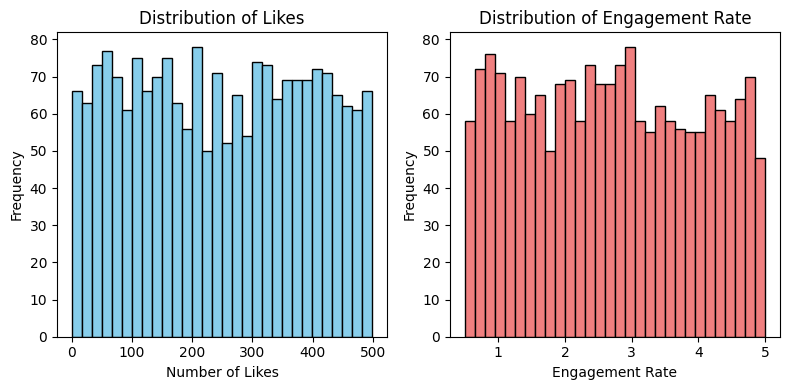

In [52]:
'''Histogram Analysis'''
plt.figure(figsize=(8, 4))
# Histogram for 'likes'
plt.subplot(1, 2, 1)
plt.hist(df['likes'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
# Histogram for 'engagement_rate'
plt.subplot(1, 2, 2)
plt.hist(df['engagement_rate'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

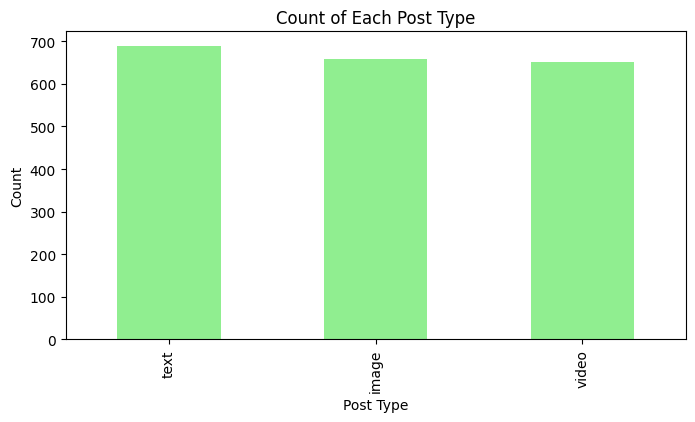

In [53]:
''' Bar chart '''
post_type_counts = df['post_type'].value_counts()
# Plotting
plt.figure(figsize=(8, 4))
post_type_counts.plot(kind='bar', color='lightgreen')
plt.title('Count of Each Post Type')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.show()

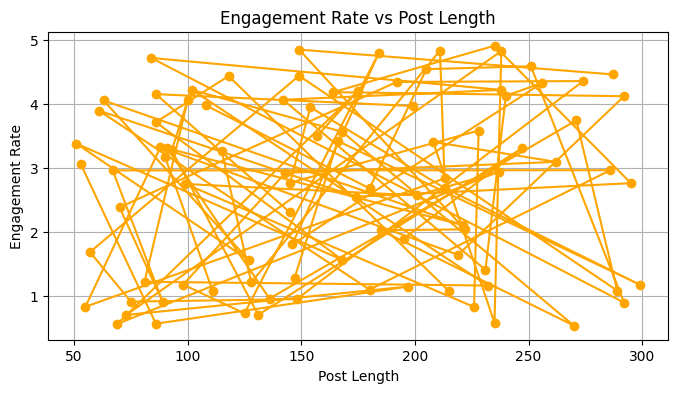

In [54]:
'''Line plot'''
plt.figure(figsize=(8, 4))
plt.plot(df['post_length'].iloc[:100], df['engagement_rate'].iloc[:100], marker='o', linestyle='-', color='orange')
# Adding labels and title
plt.xlabel('Post Length')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate vs Post Length')
# Display the plot
plt.grid(True)
plt.show()

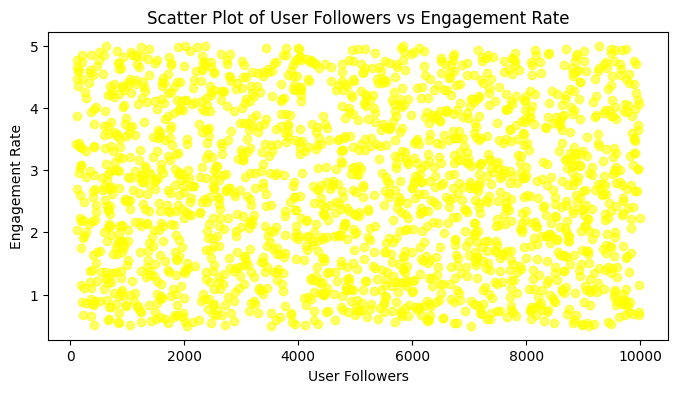

In [55]:
''' Scatter plot'''
plt.figure(figsize=(8, 4))
# Scatter plot with orange color
plt.scatter(df['user_followers'], df['engagement_rate'], color='yellow', alpha=0.6)
# Set plot labels and title
plt.title('Scatter Plot of User Followers vs Engagement Rate')
plt.xlabel('User Followers')
plt.ylabel('Engagement Rate')
# Show the plot
plt.show()

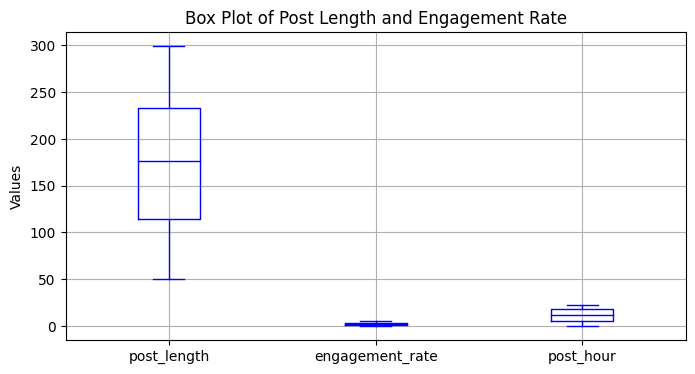

In [56]:
'''Box plot'''
plt.figure(figsize=(8, 4))
df.boxplot(column=['post_length', 'engagement_rate','post_hour'], color='blue')
plt.title('Box Plot of Post Length and Engagement Rate')
plt.ylabel('Values')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)


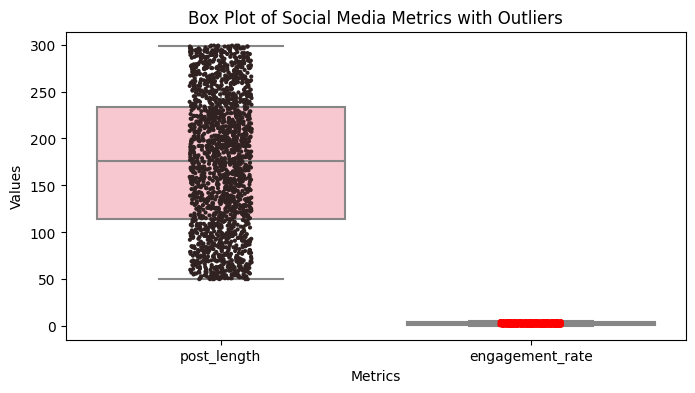

In [57]:
'''Box plot'''
# Set a pink color palette for the box plot
sns.set_palette("pastel")
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))
# Box plot for 'post_length' and 'engagement_rate' with pink color
sns.boxplot(data=df[['post_length', 'engagement_rate']], color='pink', ax=ax)
# Highlight outliers with a different color
sns.stripplot(data=df[['post_length', 'engagement_rate']], color='red', size=3, jitter=True, ax=ax)
# Set plot labels and title
ax.set(xlabel='Metrics', ylabel='Values', title='Box Plot of Social Media Metrics with Outliers')
# Display the plot
plt.show()

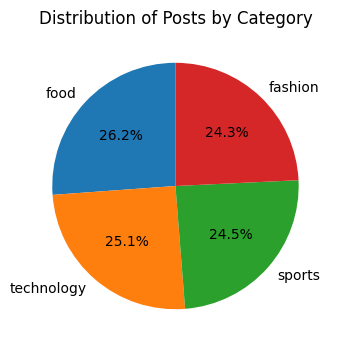

In [58]:
'''pie chart'''
# Set a dark color palette
dark_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
# Count the number of posts in each category
category_counts = df['post_category'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=dark_colors, startangle=90)
plt.title('Distribution of Posts by Category')
plt.show()

In [59]:
#Imputations

In [60]:
# Count of missing values in each column
missing_count = df.isnull().sum()
# Percentage of missing values in each column
missing_percentage = (missing_count / len(df)) * 100
# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})
# Display the missing values information
print(missing_info)


                 Missing Count  Missing Percentage
user_id                      0                 0.0
post_type                    0                 0.0
post_length                100                 5.0
likes                        0                 0.0
comments                     0                 0.0
shares                       0                 0.0
engagement_rate            100                 5.0
user_followers               0                 0.0
post_category                0                 0.0
post_hour                    0                 0.0
is_weekend                   0                 0.0
user_verified                0                 0.0
spam_flag                    0                 0.0


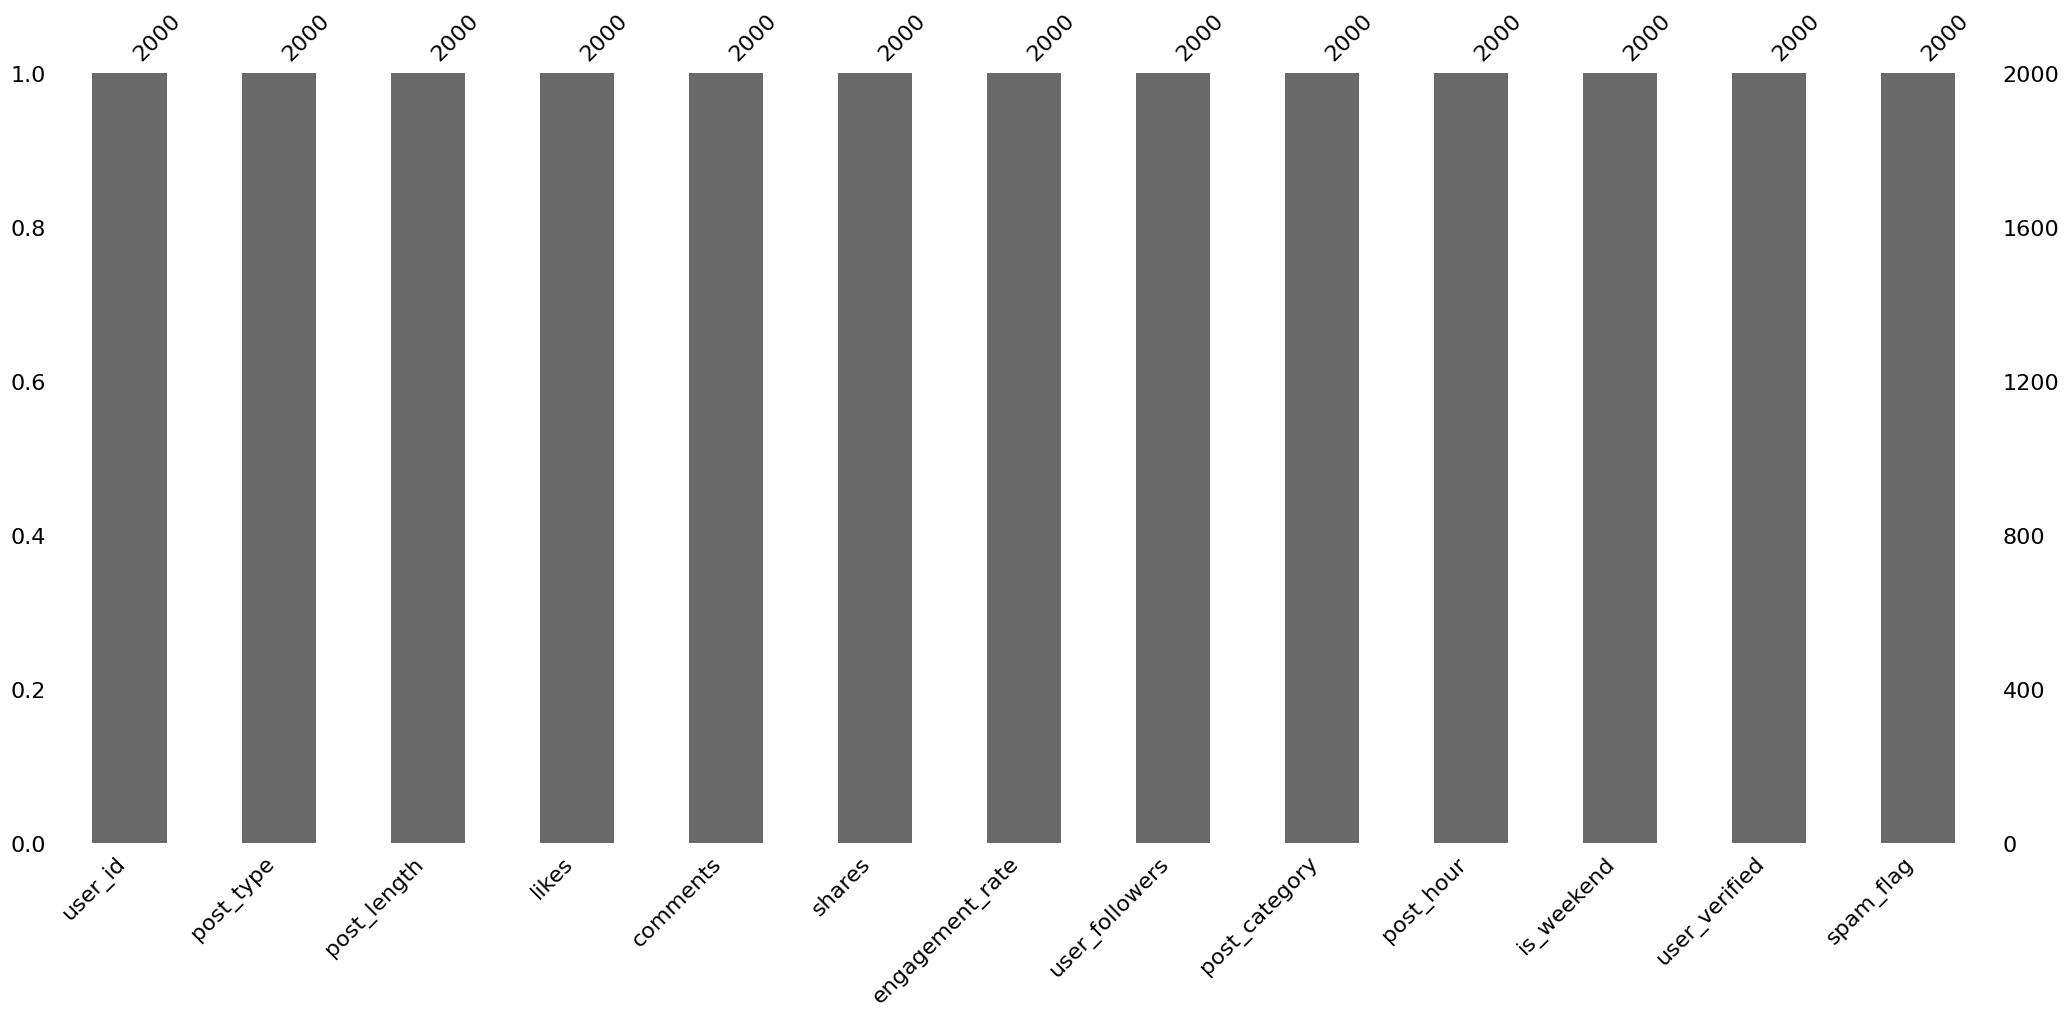

In [61]:
'''Missing value Imputation'''
import missingno as msno
# Impute missing values (using mean in this example)
df['post_length'].fillna(df['post_length'].mean(), inplace=True)
df['engagement_rate'].fillna(df['engagement_rate'].mean(), inplace=True)
# Visualize again after imputation

msno.bar(df)
plt.show()


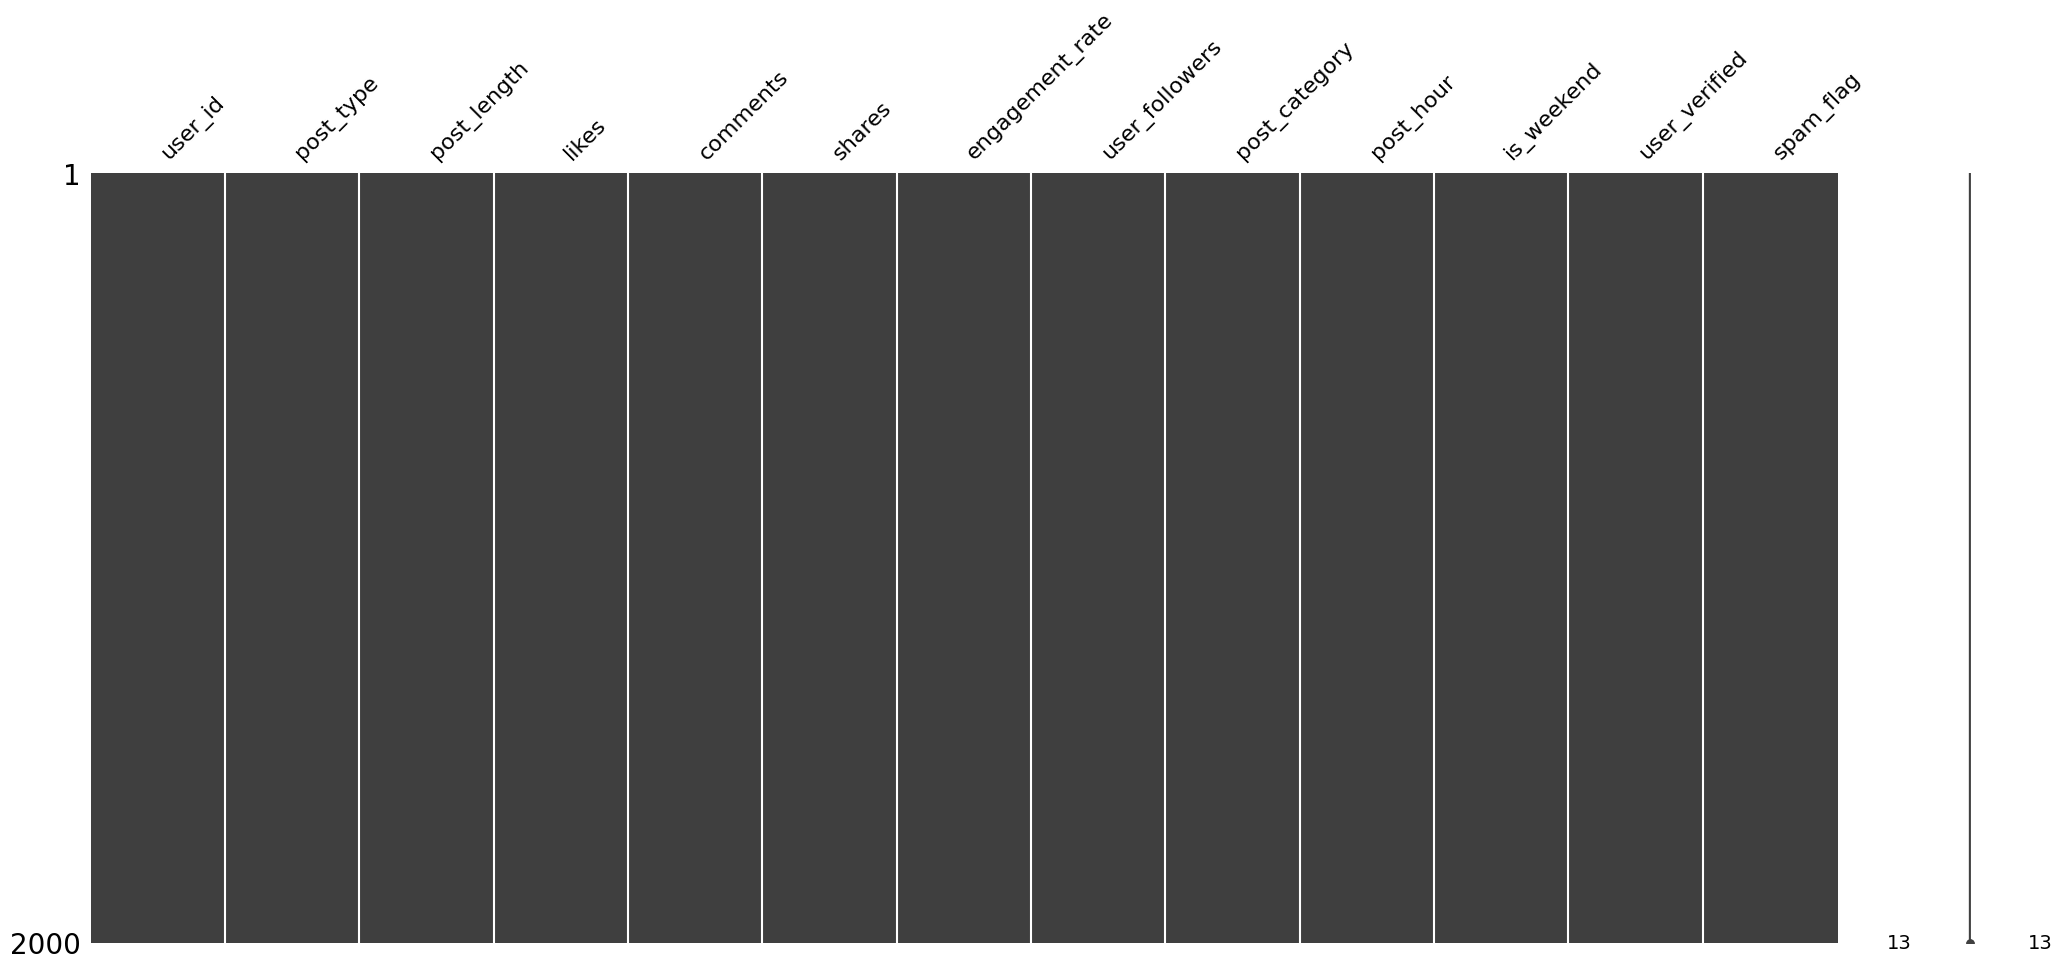

In [62]:
import missingno as msno
# Impute missing values (using mean in this example)
df['post_length'].fillna(df['post_length'].mean(), inplace=True)
df['engagement_rate'].fillna(df['engagement_rate'].mean(), inplace=True)
# Visualize again after imputation
msno.matrix(df)
plt.show()

In [63]:
most_frequent_shares = df['shares'].mode().iloc[0]
# Replace missing values in the 'shares' column with the most frequent value
df['shares'].fillna(most_frequent_shares, inplace=True)
# Display the first few rows of the updated dataset


<Axes: >

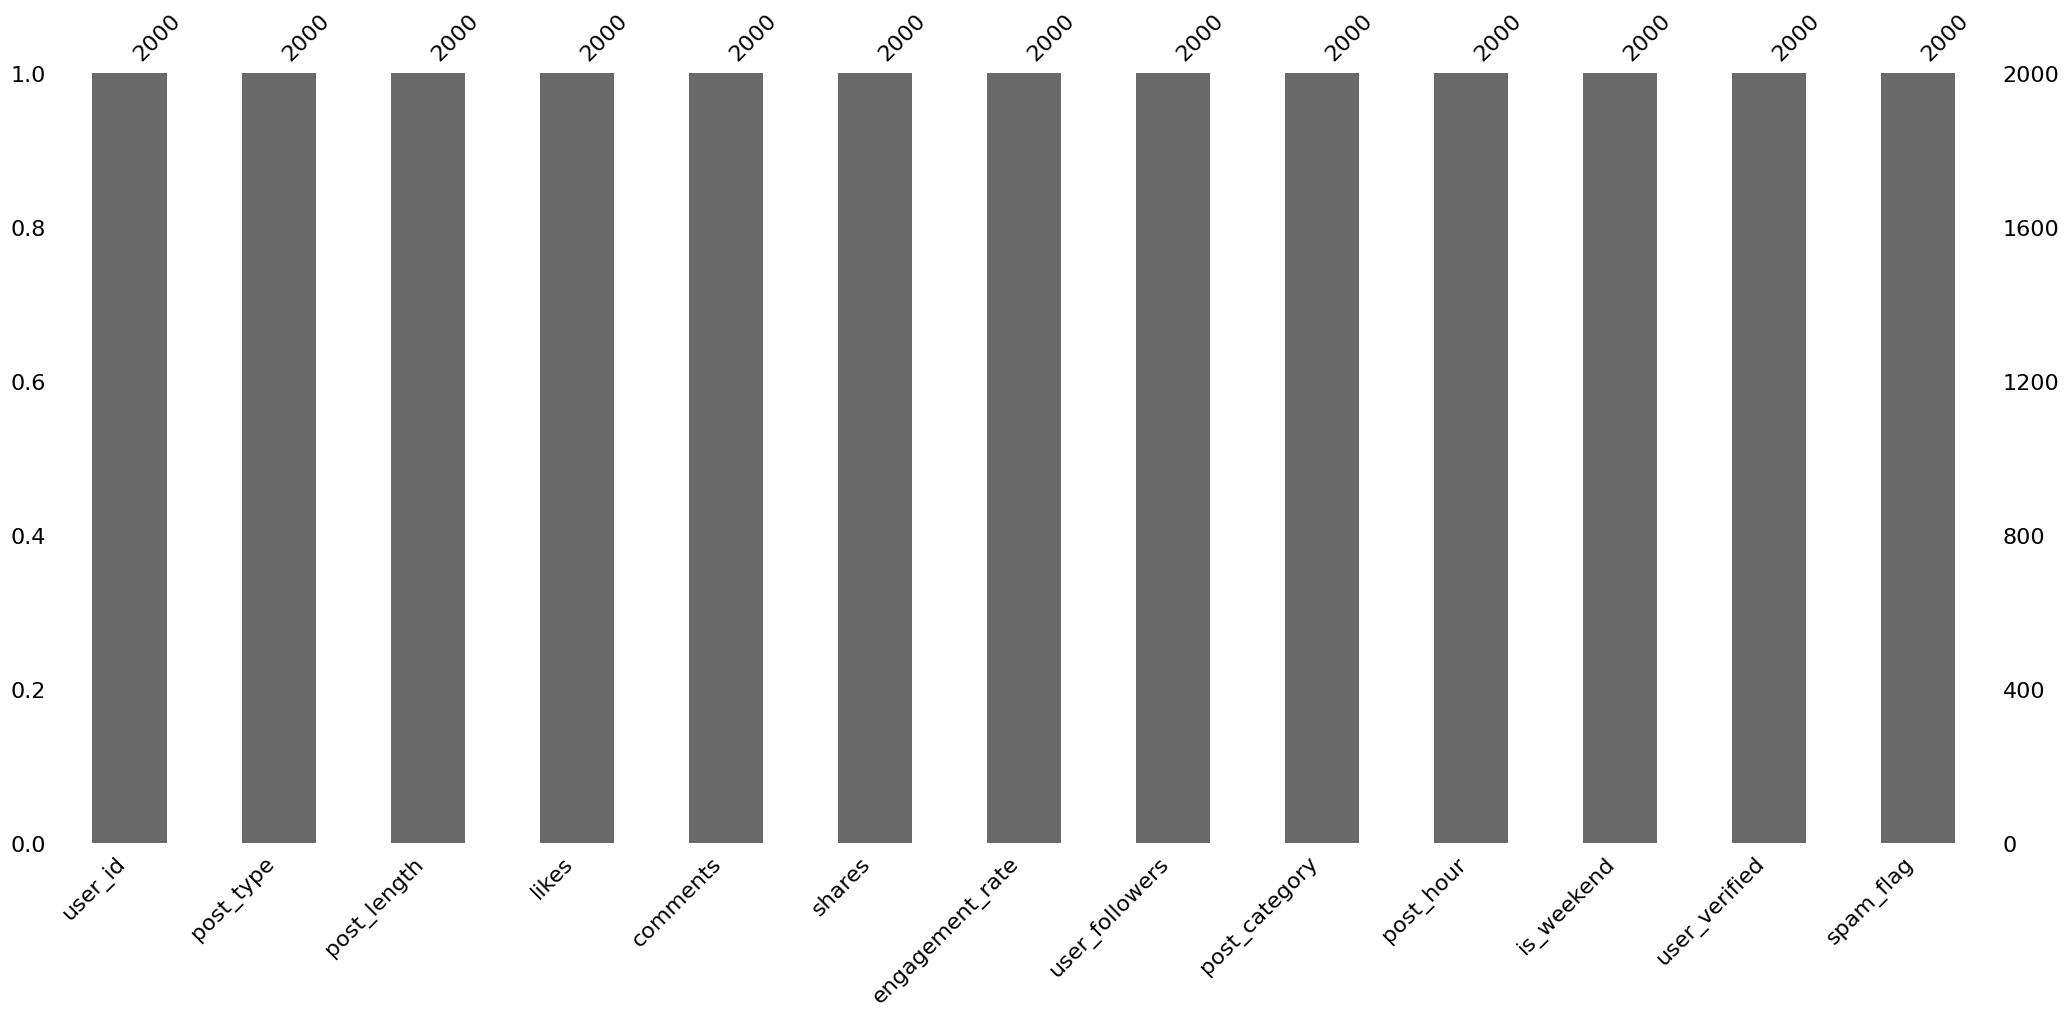

In [64]:
'''Imputation Method1: most common class'''
most_common_post_length = df['post_length'].mode()[0]
df['post_length'].fillna(most_common_post_length, inplace=True)
msno.bar(df)

   user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          

<Axes: >

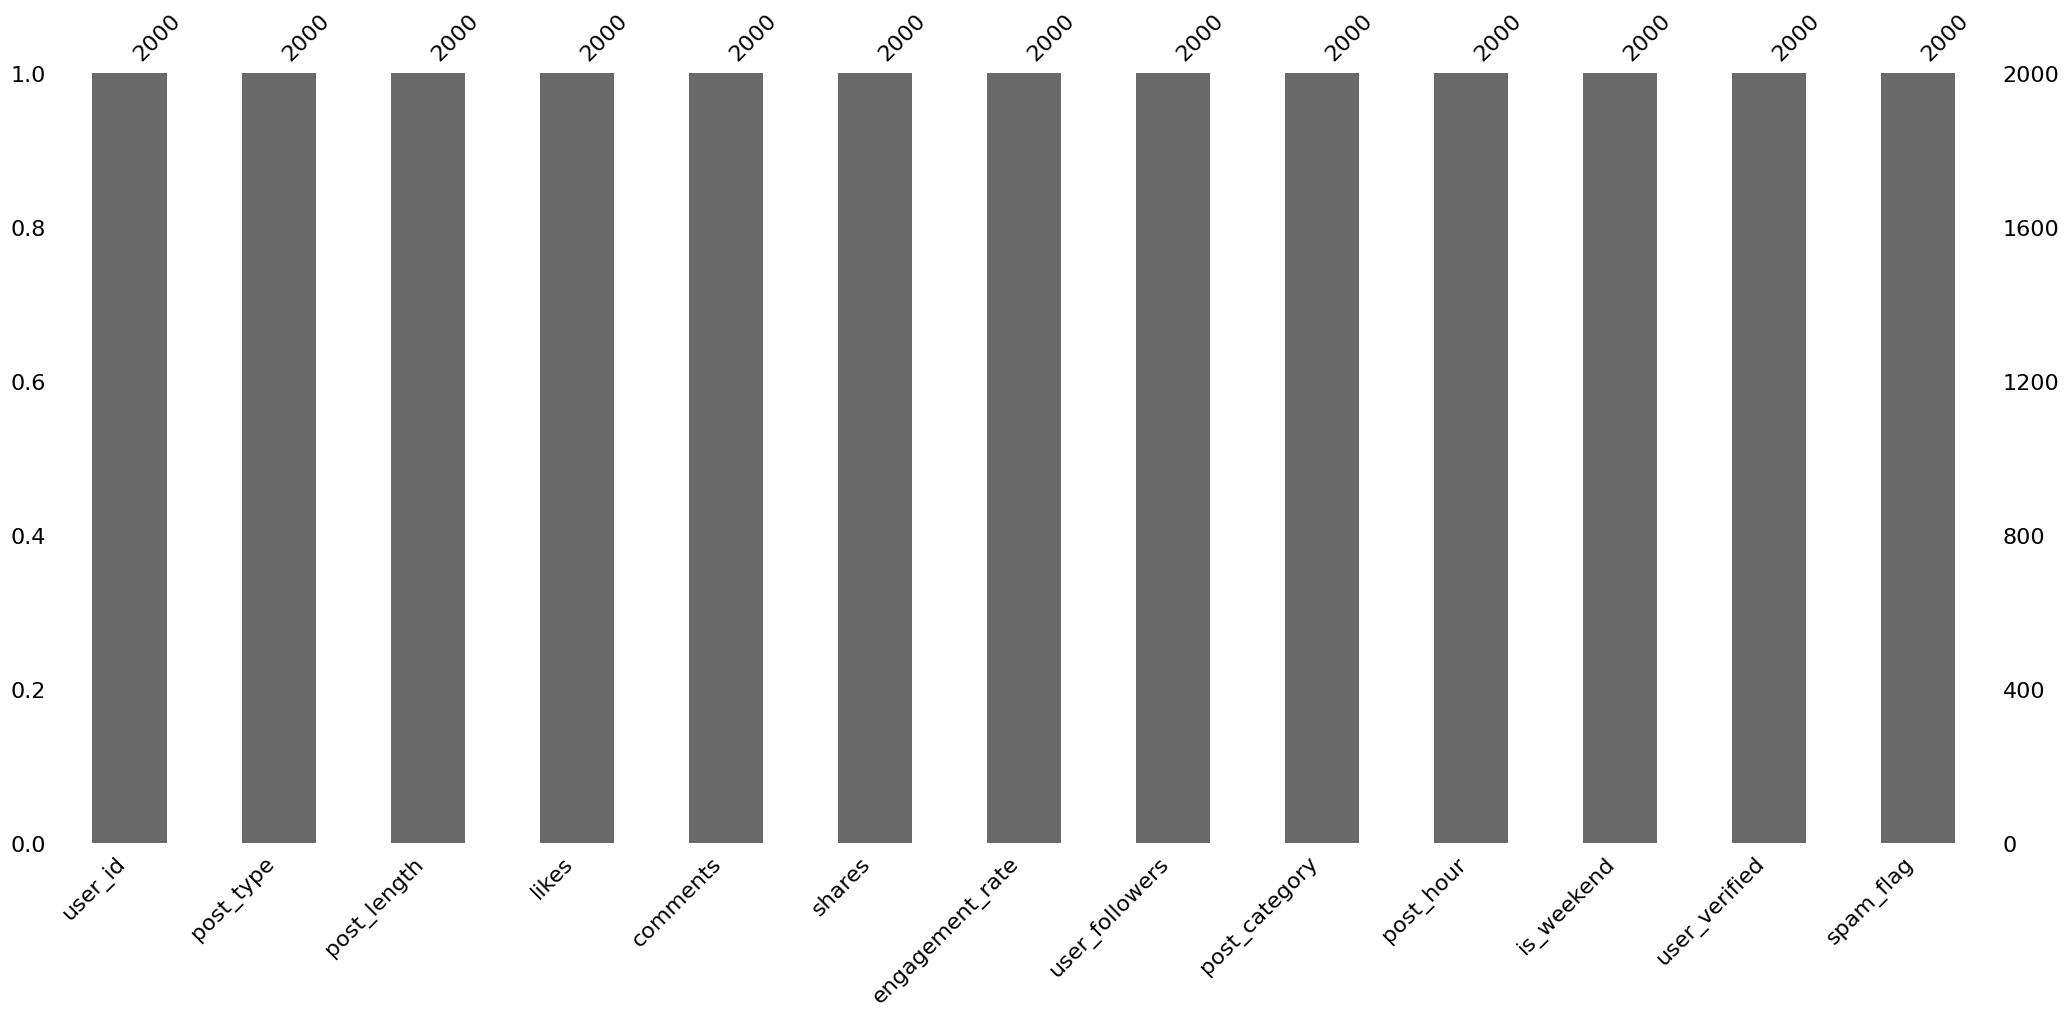

In [65]:
from sklearn.impute import KNNImputer
# Copy the DataFrame to preserve the original data
df_imputed = df.copy()
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)
# Impute missing values in the 'engagement_rate' column
imputer_columns = ['post_length', 'engagement_rate']  # Columns to impute
df_imputed[imputer_columns] = imputer.fit_transform(df_imputed[imputer_columns])
# Display the first few rows of the imputed dataset
print(df_imputed.head())
msno.bar(df_imputed)

   user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0  306.0      52.0    35.0         4.457269   
1        2      text        149.0  330.0      78.0    36.0         4.845244   
2        3     video        222.0  460.0      78.0    40.0         2.037067   
3        4     video        185.0  265.0       3.0    16.0         2.023281   
4        5      text        270.0  397.0      95.0    34.0         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0          9204.0       fashion        3.0         0.0            0.0   
1           596.0        sports        7.0         0.0            1.0   
2          1563.0          food       12.0         1.0            1.0   
3          6928.0        sports        9.0         1.0            0.0   
4          4353.0          food       17.0         1.0            1.0   

   spam_flag  
0        0.0  
1        0.0  
2        1.0  
3        0.0  
4        1.

<Axes: >

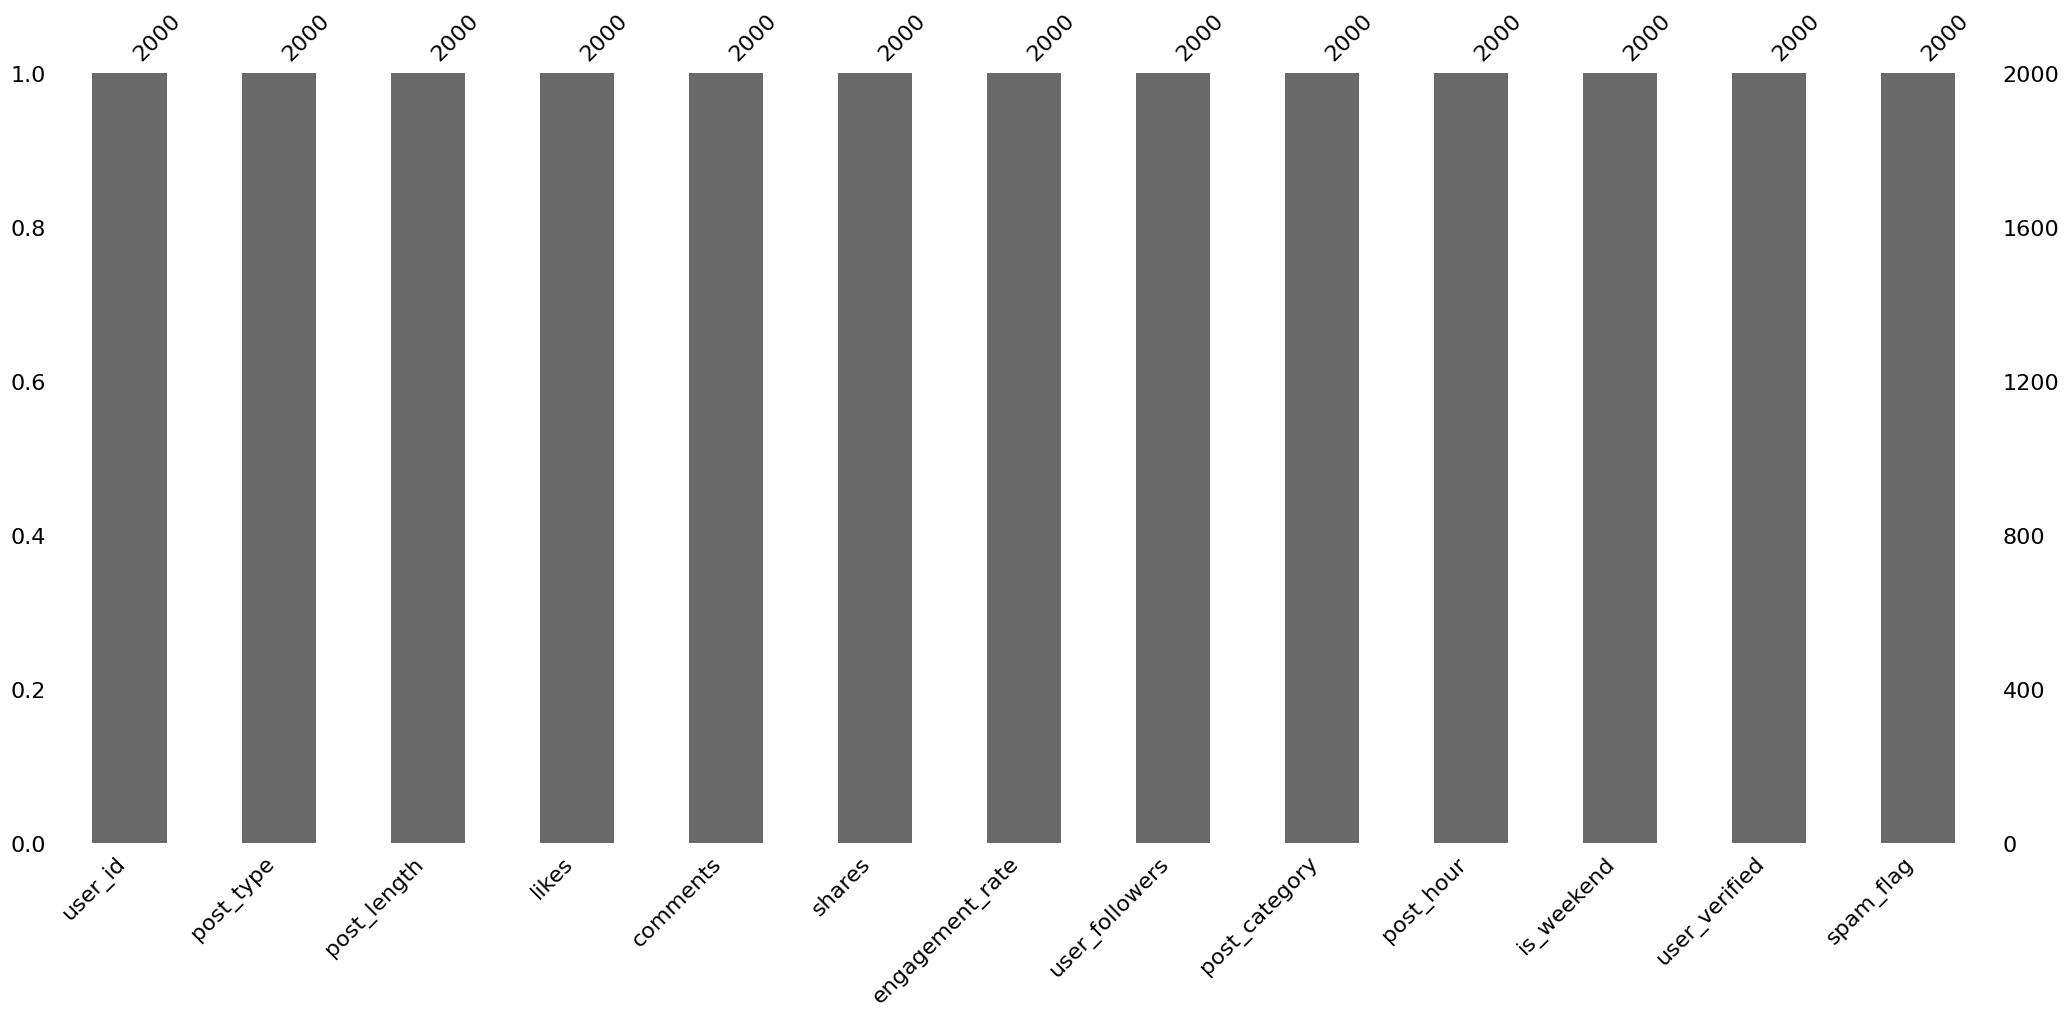

In [66]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Creating an IterativeImputer instance
imputer = IterativeImputer(random_state=0)
# Columns to consider for imputation (excluding user_id which is not relevant for imputation)
columns_for_imputation = ['post_length', 'likes', 'comments', 'shares', 'user_followers', 'post_hour', 'is_weekend', 'user_verified', 'spam_flag']
# Fit the imputer on the columns and transform the dataset
df_imputed = df.copy()  # Create a copy of the DataFrame
df_imputed[columns_for_imputation] = imputer.fit_transform(df_imputed[columns_for_imputation])
# Display the first few rows of the dataset with imputed values
print(df_imputed.head())
msno.bar(df_imputed)

   user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          

<Axes: >

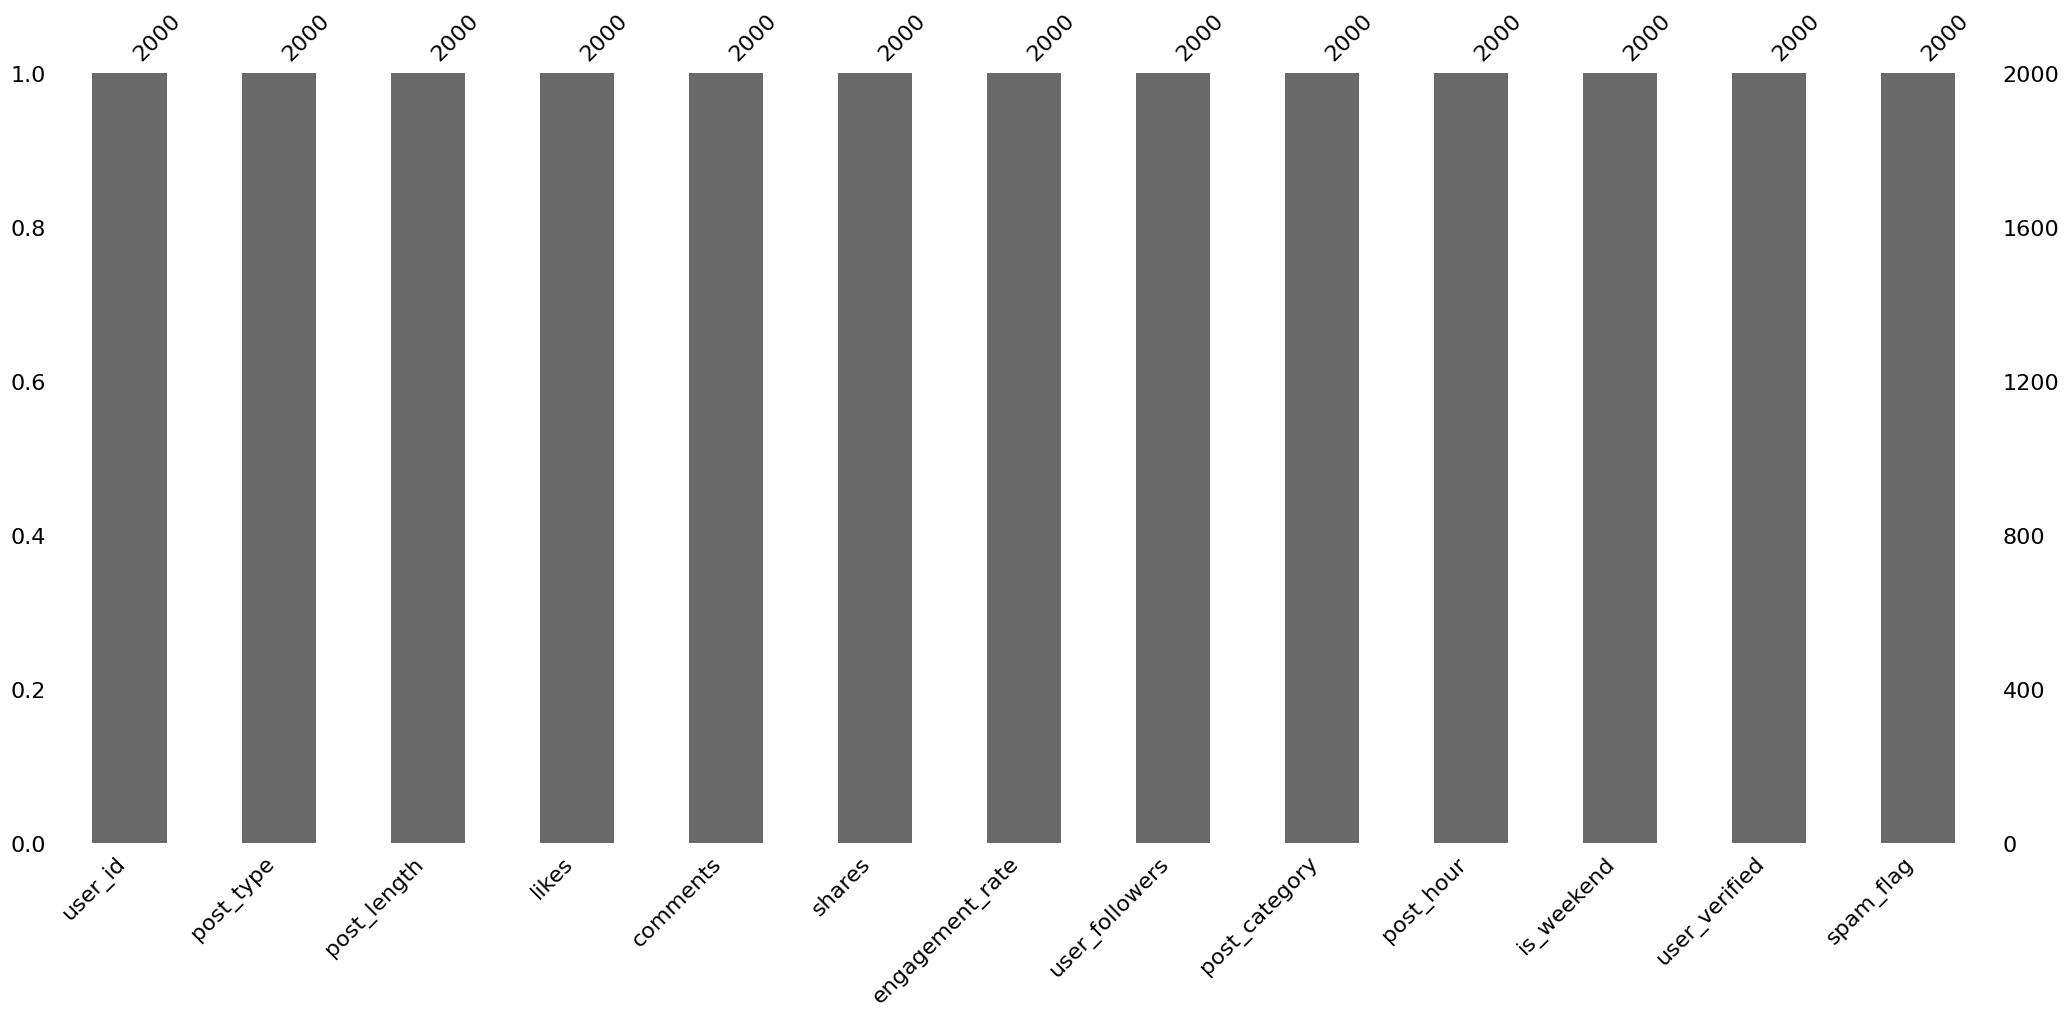

In [67]:
df_cleaned = df.dropna(subset=['post_length', 'engagement_rate'])
# Display the first few rows of the cleaned dataset
print(df_cleaned.head())
msno.bar(df_cleaned)

In [68]:
df.isnull().sum()

user_id            0
post_type          0
post_length        0
likes              0
comments           0
shares             0
engagement_rate    0
user_followers     0
post_category      0
post_hour          0
is_weekend         0
user_verified      0
spam_flag          0
dtype: int64

In [69]:
nan_indices_categorical = np.random.choice(df.index, size=int(0.1 * len(df)), replace=False)
df.loc[nan_indices_categorical, 'post_category'] = np.nan
# Introduce NaN values for some records in post_length and engagement_rate columns
nan_indices_numeric = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
df.loc[nan_indices_numeric, 'post_length'] = np.nan
df.loc[nan_indices_numeric, 'engagement_rate'] = np.nan
print(df)


      user_id post_type  post_length  likes  comments  shares  \
0           1     video        287.0    306        52      35   
1           2      text        149.0    330        78      36   
2           3     video        222.0    460        78      40   
3           4     video        185.0    265         3      16   
4           5      text        270.0    397        95      34   
...       ...       ...          ...    ...       ...     ...   
1995     1996      text        240.0    355        74      30   
1996     1997     video         78.0    390        41      41   
1997     1998     image        154.0    277        32      40   
1998     1999     video        251.0     73        49      42   
1999     2000     video        243.0    486        62      15   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
0            4.457269            9204       fashion          3           0   
1            4.845244             596        sports          7 

In [70]:
df.isnull()

user_id  post_type  post_length  likes  comments  shares  \
0       False      False        False  False     False   False   
1       False      False        False  False     False   False   
2       False      False        False  False     False   False   
3       False      False        False  False     False   False   
4       False      False        False  False     False   False   
...       ...        ...          ...    ...       ...     ...   
1995    False      False        False  False     False   False   
1996    False      False        False  False     False   False   
1997    False      False        False  False     False   False   
1998    False      False        False  False     False   False   
1999    False      False        False  False     False   False   

      engagement_rate  user_followers  post_category  post_hour  is_weekend  \
0               False           False          False      False       False   
1               False           False          False      False       False   
2               False           False          False      False       False   
3               False           False          False      False       False   
4               False           False          False      False       False   
...               ...             ...            ...        ...         ...   
1995            False           False           True      False       False   
1996            False           False          False      False       False   
1997            False           False          False      False       False   
1998            False           False          False      False       False   
1999            False           False          False      False       False   

      user_verified  spam_flag  
0             False      False  
1             False      False  
2             False      False  
3             False      False  
4             False      False  
...             ...        ...  
1995          False      False  
1996          False      False  
1997          False      False  
1998          False      False  
1999          False      False  

[2000 rows x 13 columns]

In [71]:
df.isnull().sum()

user_id              0
post_type            0
post_length        100
likes                0
comments             0
shares               0
engagement_rate    100
user_followers       0
post_category      200
post_hour            0
is_weekend           0
user_verified        0
spam_flag            0
dtype: int64

In [72]:
most_common_post_type = df['post_length'].mode()[0]
df['post_length'].fillna(most_common_post_length, inplace=True)
# Display the first few rows of the dataset after imputation
print(df.head())

   user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          

In [73]:
df.isnull().sum()

user_id              0
post_type            0
post_length          0
likes                0
comments             0
shares               0
engagement_rate    100
user_followers       0
post_category      200
post_hour            0
is_weekend           0
user_verified        0
spam_flag            0
dtype: int64

In [74]:
'''Imputation method 2: Unknown class'''
df['post_category'].fillna("Unknown", inplace=True)
# Display the first few rows of the dataset with imputed values
print(df.head())

   user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          

In [75]:
df.isnull().sum()

user_id              0
post_type            0
post_length          0
likes                0
comments             0
shares               0
engagement_rate    100
user_followers       0
post_category        0
post_hour            0
is_weekend           0
user_verified        0
spam_flag            0
dtype: int64

In [76]:
missing_values = df['engagement_rate'].isnull()
# Calculate the mode of the 'engagement_rate' column
mode_engagement_rate = df['engagement_rate'].mode()[0]
# Fill missing values with the mode
df.loc[missing_values, 'engagement_rate'] = mode_engagement_rate
# Display the first few rows of the DataFrame after imputation
print(df.head())

   user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          

In [77]:
df.isnull().sum()

user_id            0
post_type          0
post_length        0
likes              0
comments           0
shares             0
engagement_rate    0
user_followers     0
post_category      0
post_hour          0
is_weekend         0
user_verified      0
spam_flag          0
dtype: int64

In [78]:
#Remove noise from the data.

In [79]:
df_cleaned = df.dropna()
# OR
# Impute missing values with the mean
df_cleaned = df.fillna(df.mean())
print(df_cleaned)

      user_id post_type  post_length  likes  comments  shares  \
0           1     video        287.0    306        52      35   
1           2      text        149.0    330        78      36   
2           3     video        222.0    460        78      40   
3           4     video        185.0    265         3      16   
4           5      text        270.0    397        95      34   
...       ...       ...          ...    ...       ...     ...   
1995     1996      text        240.0    355        74      30   
1996     1997     video         78.0    390        41      41   
1997     1998     image        154.0    277        32      40   
1998     1999     video        251.0     73        49      42   
1999     2000     video        243.0    486        62      15   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
0            4.457269            9204       fashion          3           0   
1            4.845244             596        sports          7 

<ipython-input-79-16939bcf5c5d>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned = df.fillna(df.mean())


In [80]:
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1
# Remove outliers
df_cleaned = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_cleaned)

      user_id post_type  post_length  likes  comments  shares  \
0           1     video        287.0    306        52      35   
1           2      text        149.0    330        78      36   
2           3     video        222.0    460        78      40   
3           4     video        185.0    265         3      16   
4           5      text        270.0    397        95      34   
...       ...       ...          ...    ...       ...     ...   
1995     1996      text        240.0    355        74      30   
1996     1997     video         78.0    390        41      41   
1997     1998     image        154.0    277        32      40   
1998     1999     video        251.0     73        49      42   
1999     2000     video        243.0    486        62      15   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
0            4.457269            9204       fashion          3           0   
1            4.845244             596        sports          7 

<ipython-input-80-88282a74ba1c>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_cleaned.quantile(0.25)
<ipython-input-80-88282a74ba1c>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_cleaned.quantile(0.75)
<ipython-input-80-88282a74ba1c>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]


In [81]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
df_cleaned[['post_length', 'likes', 'comments', 'shares', 'engagement_rate', 'user_followers']] = scaler.fit_transform(df_cleaned[['post_length', 'likes', 'comments', 'shares', 'engagement_rate', 'user_followers']])

In [82]:
print(df_cleaned)

      user_id post_type  post_length     likes  comments    shares  \
0           1     video     1.662571  0.404307  0.083835  0.751617   
1           2      text    -0.373997  0.570154  0.992237  0.820983   
2           3     video     0.703318  1.468493  0.992237  1.098447   
3           4     video     0.157282  0.120985 -1.628154 -0.566340   
4           5      text     1.411690  1.033144  1.586192  0.682251   
...       ...       ...          ...       ...       ...       ...   
1995     1996      text     0.968957  0.742912  0.852483  0.404786   
1996     1997     video    -1.421797  0.984772 -0.300489  1.167814   
1997     1998     image    -0.300208  0.203909 -0.614936  1.098447   
1998     1999     video     1.131293 -1.205791 -0.020981  1.237180   
1999     2000     video     1.013231  1.648160  0.433220 -0.635706   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
0            1.437204        1.451123       fashion          3           0   
1  

In [83]:
# One-hot encode categorical variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['post_type', 'post_category'])

In [84]:
df.shape

(2000, 13)

In [85]:
df.min

<bound method NDFrame._add_numeric_operations.<locals>.min of       user_id post_type  post_length  likes  comments  shares  \
0           1     video        287.0    306        52      35   
1           2      text        149.0    330        78      36   
2           3     video        222.0    460        78      40   
3           4     video        185.0    265         3      16   
4           5      text        270.0    397        95      34   
...       ...       ...          ...    ...       ...     ...   
1995     1996      text        240.0    355        74      30   
1996     1997     video         78.0    390        41      41   
1997     1998     image        154.0    277        32      40   
1998     1999     video        251.0     73        49      42   
1999     2000     video        243.0    486        62      15   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
0            4.457269            9204       fashion          3           0   
1

In [86]:
df.max

<bound method NDFrame._add_numeric_operations.<locals>.max of       user_id post_type  post_length  likes  comments  shares  \
0           1     video        287.0    306        52      35   
1           2      text        149.0    330        78      36   
2           3     video        222.0    460        78      40   
3           4     video        185.0    265         3      16   
4           5      text        270.0    397        95      34   
...       ...       ...          ...    ...       ...     ...   
1995     1996      text        240.0    355        74      30   
1996     1997     video         78.0    390        41      41   
1997     1998     image        154.0    277        32      40   
1998     1999     video        251.0     73        49      42   
1999     2000     video        243.0    486        62      15   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
0            4.457269            9204       fashion          3           0   
1

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2000 non-null   int64  
 1   post_type        2000 non-null   object 
 2   post_length      2000 non-null   float64
 3   likes            2000 non-null   int64  
 4   comments         2000 non-null   int64  
 5   shares           2000 non-null   int64  
 6   engagement_rate  2000 non-null   float64
 7   user_followers   2000 non-null   int64  
 8   post_category    2000 non-null   object 
 9   post_hour        2000 non-null   int64  
 10  is_weekend       2000 non-null   int64  
 11  user_verified    2000 non-null   int64  
 12  spam_flag        2000 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 203.2+ KB


In [88]:
df.describe()

user_id  post_length        likes     comments       shares  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean   1000.500000   174.342438   247.492000    49.600500    24.164500   
std     577.494589    67.777981   144.747846    28.628844    14.419862   
min       1.000000    50.000000     0.000000     0.000000     0.000000   
25%     500.750000   121.000000   120.000000    24.000000    12.000000   
50%    1000.500000   174.162632   246.500000    50.000000    24.000000   
75%    1500.250000   226.000000   374.000000    75.000000    37.000000   
max    2000.000000   299.000000   499.000000    99.000000    49.000000   

       engagement_rate  user_followers    post_hour   is_weekend  \
count      2000.000000     2000.000000  2000.000000  2000.000000   
mean          2.697677     5026.938000    11.745000     0.486500   
std           1.224622     2879.222375     6.840349     0.499943   
min           0.501085      107.000000     0.000000     0.000000   
25%           1.692623     2467.500000     6.000000     0.000000   
50%           2.693385     5096.500000    12.000000     0.000000   
75%           3.671350     7491.750000    18.000000     1.000000   
max           4.997573     9995.000000    23.000000     1.000000   

       user_verified    spam_flag  
count    2000.000000  2000.000000  
mean        0.518000     0.499500  
std         0.499801     0.500125  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         1.000000     0.000000  
75%         1.000000     1.000000  
max         1.000000     1.000000

In [89]:
df.isnull().sum()

user_id            0
post_type          0
post_length        0
likes              0
comments           0
shares             0
engagement_rate    0
user_followers     0
post_category      0
post_hour          0
is_weekend         0
user_verified      0
spam_flag          0
dtype: int64

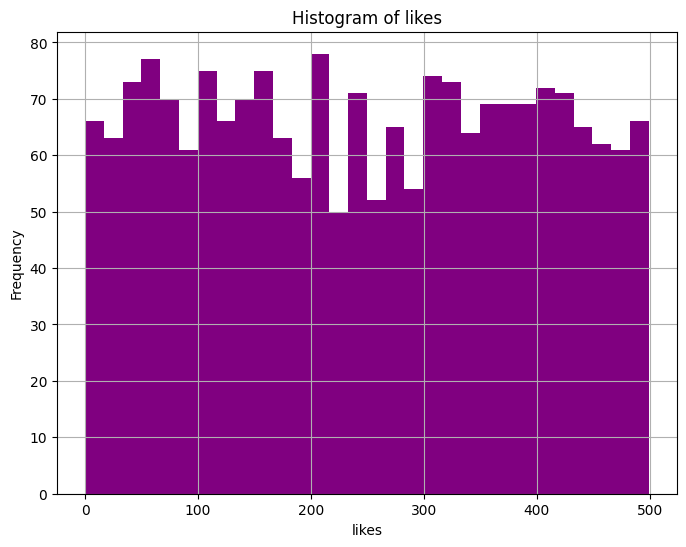

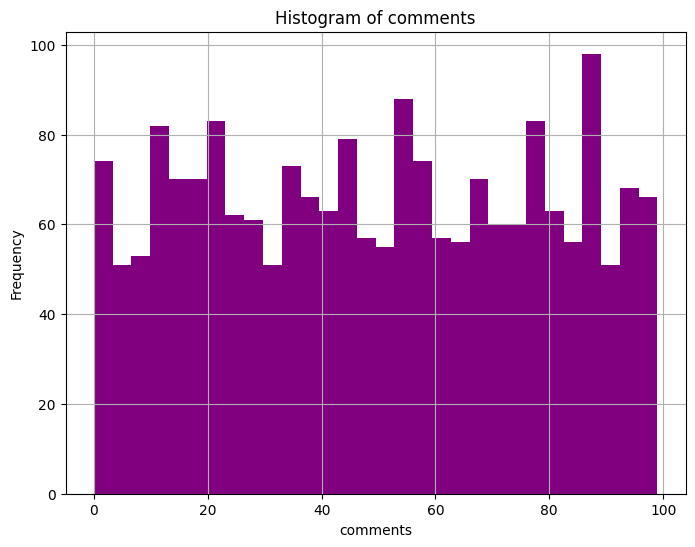

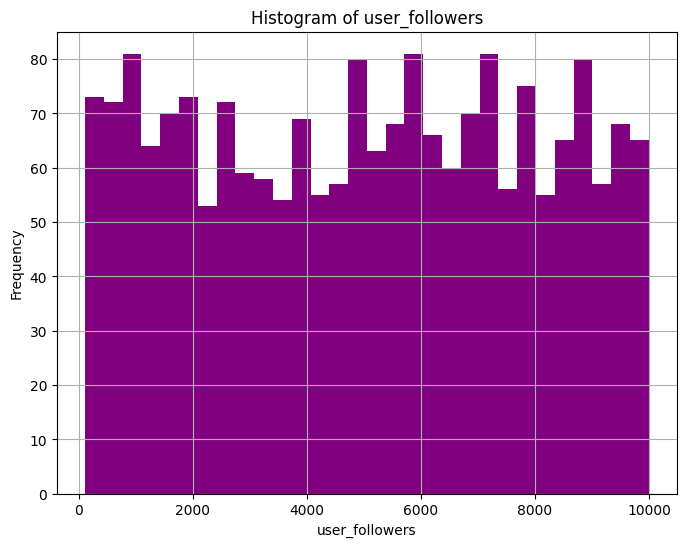

In [90]:
''' Columns for histogram analysis'''
columns_for_histogram = ['likes', 'comments', 'user_followers']
# Plotting histograms for selected columns
for column in columns_for_histogram:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column].dropna(), bins=30, color='purple')  # Drop NaN values before plotting
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [91]:
#Binning

In [92]:
# Define the number of bins
num_bins = 5
# Perform binning by mean for 'post_length'
df['post_length_bin'] = pd.cut(df['post_length'], bins=num_bins, labels=False)
post_length_means = df.groupby('post_length_bin')['post_length'].mean()
df['post_length_binned_mean'] = df['post_length_bin'].map(post_length_means)
# Perform binning by mean for 'engagement_rate'
df['engagement_rate_bin'] = pd.cut(df['engagement_rate'], bins=num_bins, labels=False)
engagement_rate_means = df.groupby('engagement_rate_bin')['engagement_rate'].mean()
df['engagement_rate_binned_mean'] = df['engagement_rate_bin'].map(engagement_rate_means)
# Display the modified DataFrame
print(df[['user_id', 'post_length', 'post_length_binned_mean', 'engagement_rate', 'engagement_rate_binned_mean']].head())

   user_id  post_length  post_length_binned_mean  engagement_rate  \
0        1        287.0               275.002959         4.457269   
1        2        149.0               125.221538         4.845244   
2        3        222.0               223.784367         2.037067   
3        4        185.0               175.187397         2.023281   
4        5        270.0               275.002959         0.531913   

   engagement_rate_binned_mean  
0                     4.535968  
1                     4.535968  
2                     1.853170  
3                     1.853170  
4                     0.959496  


In [93]:
# Binning by mode on the 'post_length' column
mode_bins = pd.cut(df['post_length'], bins=3, labels=['Short', 'Medium', 'Long'], include_lowest=True, duplicates='drop')
# Create a new column 'post_length_bin' in the DataFrame
df['post_length_bin'] = mode_bins
# Display the modified DataFrame
print("\nDataFrame with Binned 'post_length':")
print(df[['post_length', 'post_length_bin']].head())


DataFrame with Binned 'post_length':
   post_length post_length_bin
0        287.0            Long
1        149.0          Medium
2        222.0            Long
3        185.0          Medium
4        270.0            Long


In [94]:
# Specify bin boundaries for post_length
bin_boundaries = [50, 100, 150, 200, 250, 300]
# Perform binning on the 'post_length' column
df['post_length_bins'] = pd.cut(df['post_length'], bins=bin_boundaries, labels=False, right=False)
# Display the first few rows of the DataFrame with the new bin column
print(df[['post_length', 'post_length_bins']].head())

   post_length  post_length_bins
0        287.0                 4
1        149.0                 1
2        222.0                 3
3        185.0                 2
4        270.0                 4


In [95]:
#Data Visualization

In [96]:
df=pd.read_excel('/content/mediarates.xlsx')

In [97]:
df.shape

(2000, 13)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2000 non-null   int64  
 1   post_type        2000 non-null   object 
 2   post_length      1900 non-null   float64
 3   likes            2000 non-null   int64  
 4   comments         2000 non-null   int64  
 5   shares           2000 non-null   int64  
 6   engagement_rate  1900 non-null   float64
 7   user_followers   2000 non-null   int64  
 8   post_category    2000 non-null   object 
 9   post_hour        2000 non-null   int64  
 10  is_weekend       2000 non-null   int64  
 11  user_verified    2000 non-null   int64  
 12  spam_flag        2000 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 203.2+ KB


In [99]:
df.describe()

user_id  post_length        likes     comments       shares  \
count  2000.000000  1900.000000  2000.000000  2000.000000  2000.000000   
mean   1000.500000   174.162632   247.492000    49.600500    24.164500   
std     577.494589    71.251606   144.747846    28.628844    14.419862   
min       1.000000    50.000000     0.000000     0.000000     0.000000   
25%     500.750000   114.000000   120.000000    24.000000    12.000000   
50%    1000.500000   176.000000   246.500000    50.000000    24.000000   
75%    1500.250000   233.000000   374.000000    75.000000    37.000000   
max    2000.000000   299.000000   499.000000    99.000000    49.000000   

       engagement_rate  user_followers    post_hour   is_weekend  \
count      1900.000000     2000.000000  2000.000000  2000.000000   
mean          2.693385     5026.938000    11.745000     0.486500   
std           1.289315     2879.222375     6.840349     0.499943   
min           0.501085      107.000000     0.000000     0.000000   
25%           1.579119     2467.500000     6.000000     0.000000   
50%           2.683675     5096.500000    12.000000     0.000000   
75%           3.810330     7491.750000    18.000000     1.000000   
max           4.997573     9995.000000    23.000000     1.000000   

       user_verified    spam_flag  
count    2000.000000  2000.000000  
mean        0.518000     0.499500  
std         0.499801     0.500125  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         1.000000     0.000000  
75%         1.000000     1.000000  
max         1.000000     1.000000

In [100]:
df.size

26000

In [101]:
df.mean()

<ipython-input-101-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


user_id            1000.500000
post_length         174.162632
likes               247.492000
comments             49.600500
shares               24.164500
engagement_rate       2.693385
user_followers     5026.938000
post_hour            11.745000
is_weekend            0.486500
user_verified         0.518000
spam_flag             0.499500
dtype: float64

In [102]:
df.mode()

user_id post_type  post_length  likes  comments  shares  \
0           1      text        198.0   58.0      86.0    25.0   
1           2       NaN          NaN  312.0       NaN     NaN   
2           3       NaN          NaN    NaN       NaN     NaN   
3           4       NaN          NaN    NaN       NaN     NaN   
4           5       NaN          NaN    NaN       NaN     NaN   
...       ...       ...          ...    ...       ...     ...   
1995     1996       NaN          NaN    NaN       NaN     NaN   
1996     1997       NaN          NaN    NaN       NaN     NaN   
1997     1998       NaN          NaN    NaN       NaN     NaN   
1998     1999       NaN          NaN    NaN       NaN     NaN   
1999     2000       NaN          NaN    NaN       NaN     NaN   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
0            0.501085           915.0          food       14.0         0.0   
1            0.501807             NaN           NaN        NaN         NaN   
2            0.503226             NaN           NaN        NaN         NaN   
3            0.503553             NaN           NaN        NaN         NaN   
4            0.505780             NaN           NaN        NaN         NaN   
...               ...             ...           ...        ...         ...   
1995              NaN             NaN           NaN        NaN         NaN   
1996              NaN             NaN           NaN        NaN         NaN   
1997              NaN             NaN           NaN        NaN         NaN   
1998              NaN             NaN           NaN        NaN         NaN   
1999              NaN             NaN           NaN        NaN         NaN   

      user_verified  spam_flag  
0               1.0        0.0  
1               NaN        NaN  
2               NaN        NaN  
3               NaN        NaN  
4               NaN        NaN  
...             ...        ...  
1995            NaN        NaN  
1996            NaN        NaN  
1997            NaN        NaN  
1998            NaN        NaN  
1999            NaN        NaN  

[2000 rows x 13 columns]

In [103]:
df.median()

<ipython-input-103-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


user_id            1000.500000
post_length         176.000000
likes               246.500000
comments             50.000000
shares               24.000000
engagement_rate       2.683675
user_followers     5096.500000
post_hour            12.000000
is_weekend            0.000000
user_verified         1.000000
spam_flag             0.000000
dtype: float64

In [104]:
df.min()

user_id                   1
post_type             image
post_length            50.0
likes                     0
comments                  0
shares                    0
engagement_rate    0.501085
user_followers          107
post_category       fashion
post_hour                 0
is_weekend                0
user_verified             0
spam_flag                 0
dtype: object

In [105]:
df.max()

user_id                  2000
post_type               video
post_length             299.0
likes                     499
comments                   99
shares                     49
engagement_rate      4.997573
user_followers           9995
post_category      technology
post_hour                  23
is_weekend                  1
user_verified               1
spam_flag                   1
dtype: object

In [106]:
df.count()

user_id            2000
post_type          2000
post_length        1900
likes              2000
comments           2000
shares             2000
engagement_rate    1900
user_followers     2000
post_category      2000
post_hour          2000
is_weekend         2000
user_verified      2000
spam_flag          2000
dtype: int64

In [107]:
df.isnull().sum()

user_id              0
post_type            0
post_length        100
likes                0
comments             0
shares               0
engagement_rate    100
user_followers       0
post_category        0
post_hour            0
is_weekend           0
user_verified        0
spam_flag            0
dtype: int64

In [108]:
most_common_post_type = df['post_length'].mode()[0]
df['post_length'].fillna(most_common_post_length, inplace=True)
# Display the first few rows of the dataset after imputation
print(df.head())

   user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          

In [109]:
df.isnull().sum()

user_id              0
post_type            0
post_length          0
likes                0
comments             0
shares               0
engagement_rate    100
user_followers       0
post_category        0
post_hour            0
is_weekend           0
user_verified        0
spam_flag            0
dtype: int64

In [110]:
most_common_engagement_rate = df['engagement_rate'].mode()[0]
df['engagement_rate'].fillna(most_common_post_length, inplace=True)
# Display the first few rows of the dataset after imputation
print(df.head())

   user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          

In [111]:
df.isnull().sum()

user_id            0
post_type          0
post_length        0
likes              0
comments           0
shares             0
engagement_rate    0
user_followers     0
post_category      0
post_hour          0
is_weekend         0
user_verified      0
spam_flag          0
dtype: int64

In [112]:
#Data Visualisation

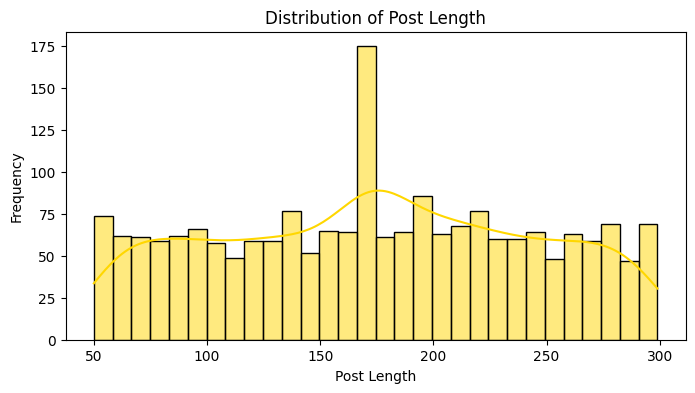

In [113]:
''' distribution plot for 'post_length' using Seaborn'''
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='post_length', kde=True, bins=30, color='gold')
# Add title and labels
plt.title('Distribution of Post Length')
plt.xlabel('Post Length')
plt.ylabel('Frequency')
# Show the plot
plt.show()

In [114]:
df.dtypes

user_id              int64
post_type           object
post_length        float64
likes                int64
comments             int64
shares               int64
engagement_rate    float64
user_followers       int64
post_category       object
post_hour            int64
is_weekend           int64
user_verified        int64
spam_flag            int64
dtype: object

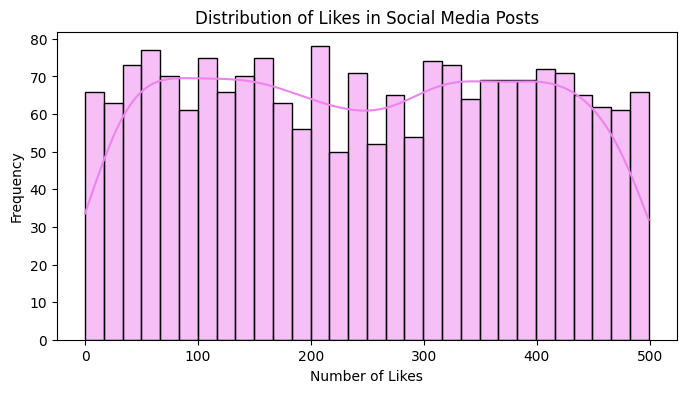

In [115]:
'''Create a histogram using Seaborn for the 'likes' column'''
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='likes', bins=30, kde=True, color='violet')
plt.title('Distribution of Likes in Social Media Posts')
plt.xlabel('Number of Likes')
plt.ylabel('Frequency')
plt.show()

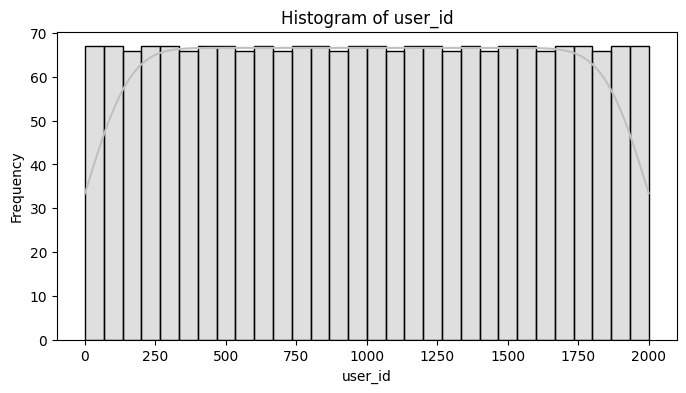

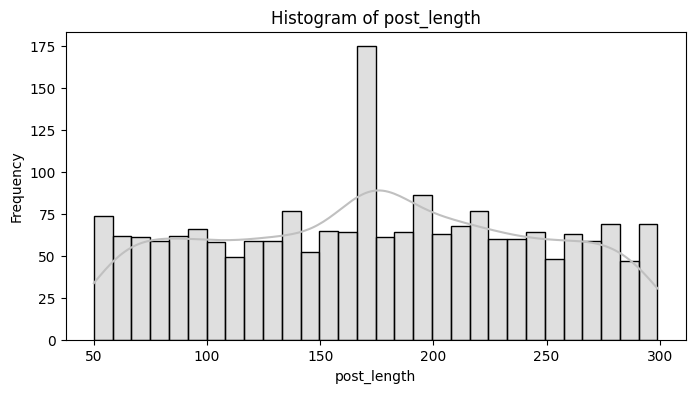

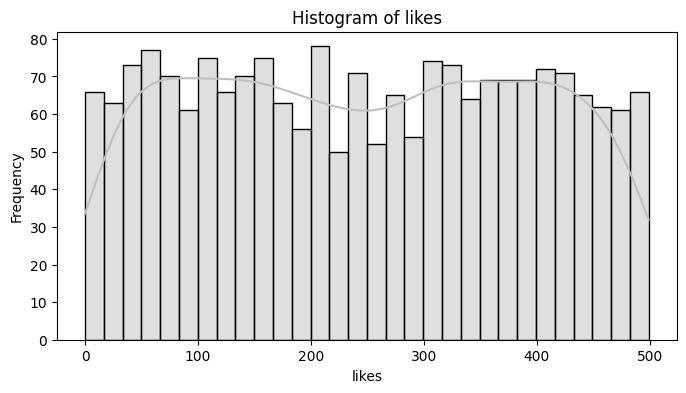

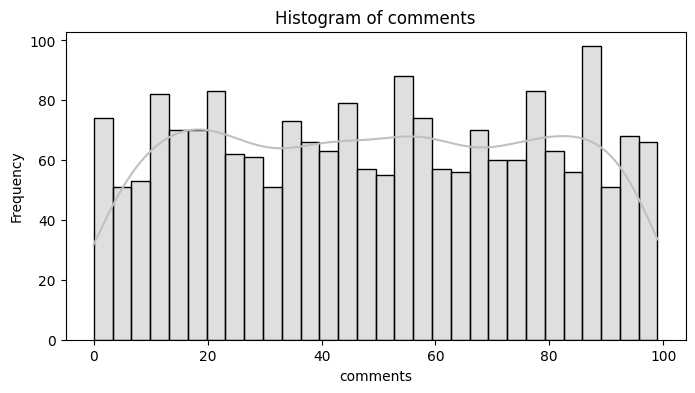

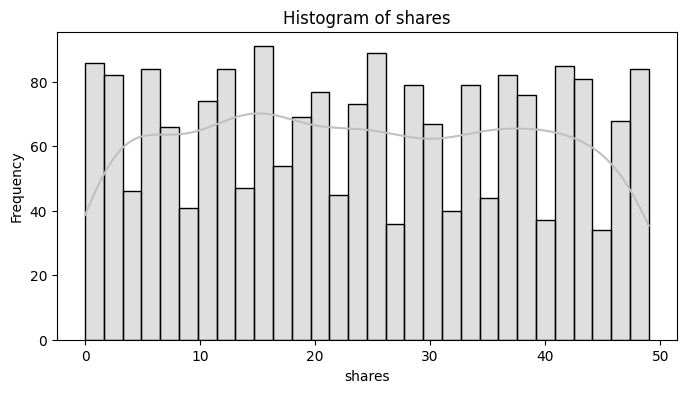

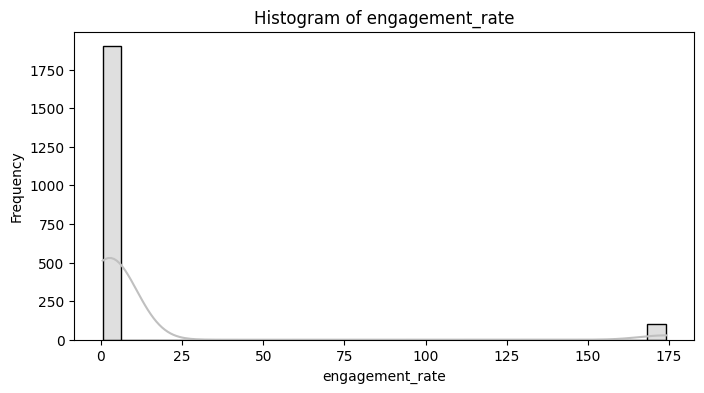

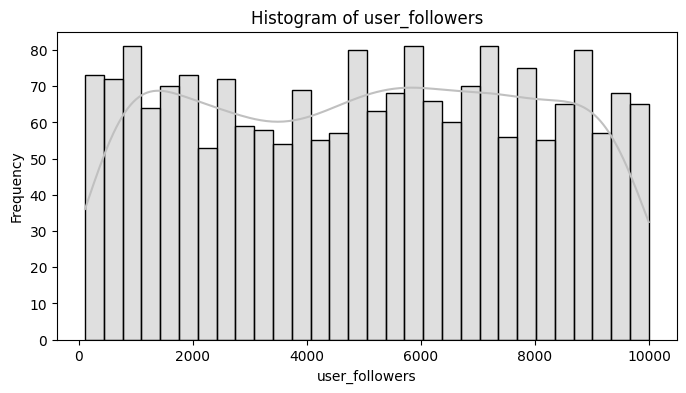

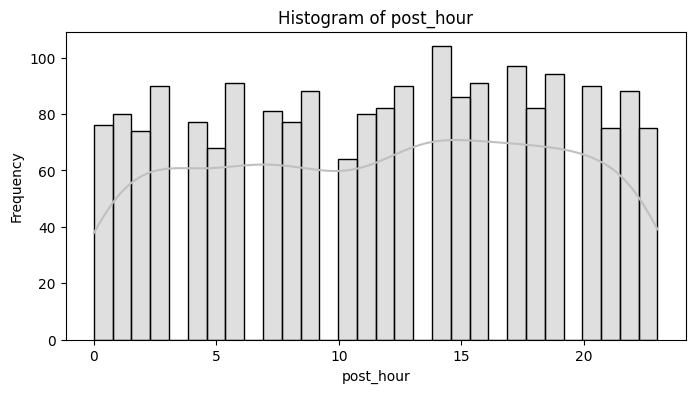

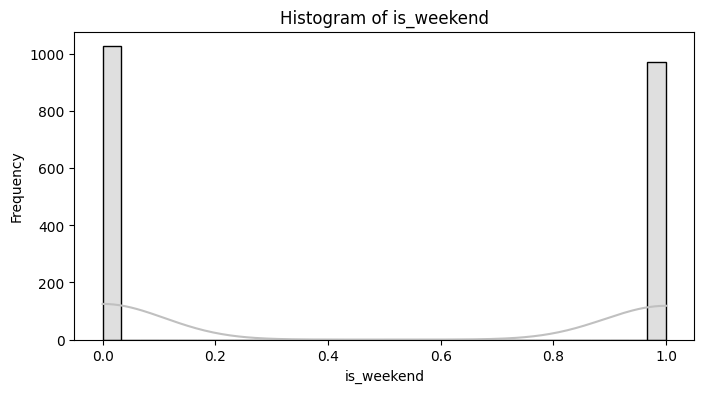

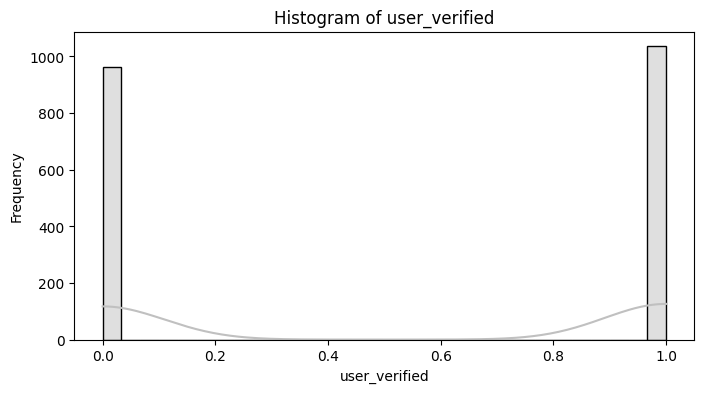

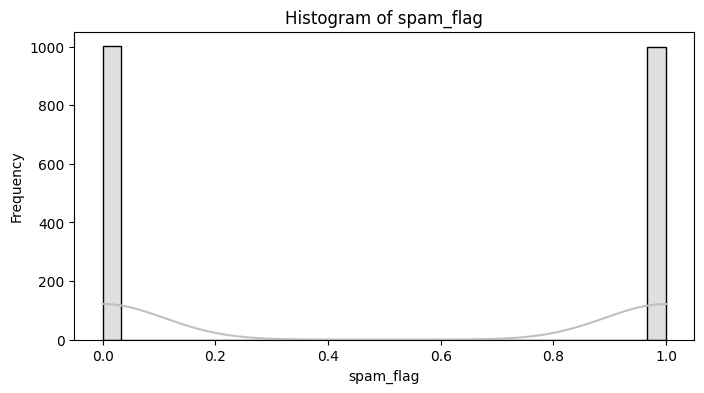

In [116]:
'''Plot histograms for all features using Seaborn'''
for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:  # Check if the column contains numerical data
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='silver')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [117]:
''' correlation matrix'''
correlation_matrix = df.corr()
print(correlation_matrix)

                  user_id  post_length     likes  comments    shares  \
user_id          1.000000     0.025051  0.003965 -0.014835  0.010452   
post_length      0.025051     1.000000  0.021944  0.036424 -0.039131   
likes            0.003965     0.021944  1.000000  0.031627  0.023215   
comments        -0.014835     0.036424  0.031627  1.000000  0.010526   
shares           0.010452    -0.039131  0.023215  0.010526  1.000000   
engagement_rate -0.047880     0.000211  0.051246 -0.005097 -0.038686   
user_followers   0.025697    -0.018255 -0.014305 -0.009352 -0.004852   
post_hour        0.002892    -0.026320 -0.007245  0.031319  0.056979   
is_weekend      -0.002593     0.007859  0.036591 -0.016682 -0.020752   
user_verified   -0.016855     0.022812  0.021611 -0.011471 -0.022380   
spam_flag        0.045393    -0.021084  0.035564  0.008808 -0.006197   

                 engagement_rate  user_followers  post_hour  is_weekend  \
user_id                -0.047880        0.025697   0.002892 

<ipython-input-117-208134a9d6f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<ipython-input-118-bc103ce5f165>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


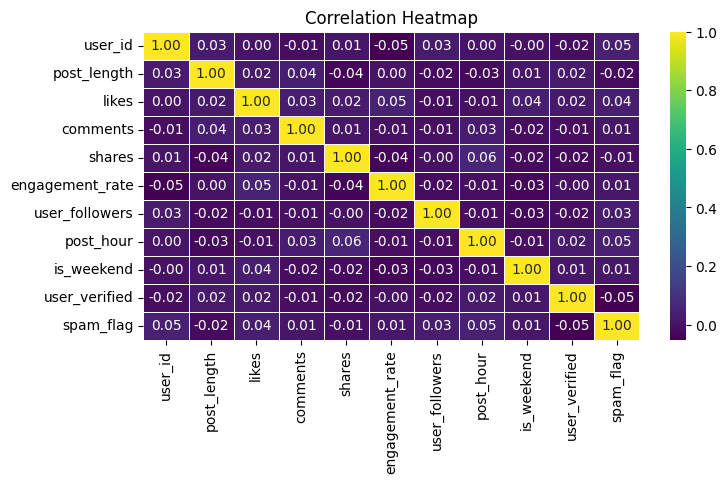

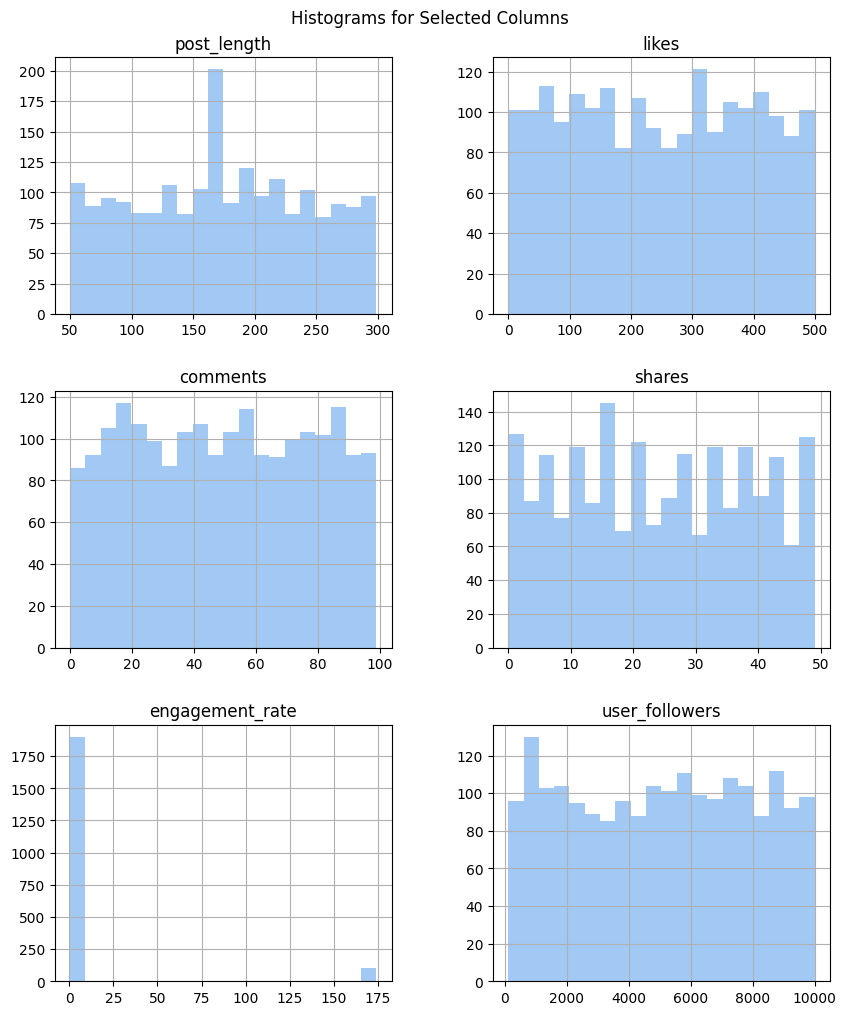

In [118]:
corr_matrix = df.corr()
# Plot correlation heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
# Plot histograms for selected columns
selected_columns = ['post_length', 'likes', 'comments', 'shares', 'engagement_rate', 'user_followers']
df[selected_columns].hist(bins=20, figsize=(10, 12))
plt.suptitle('Histograms for Selected Columns', y=0.92)
plt.show()

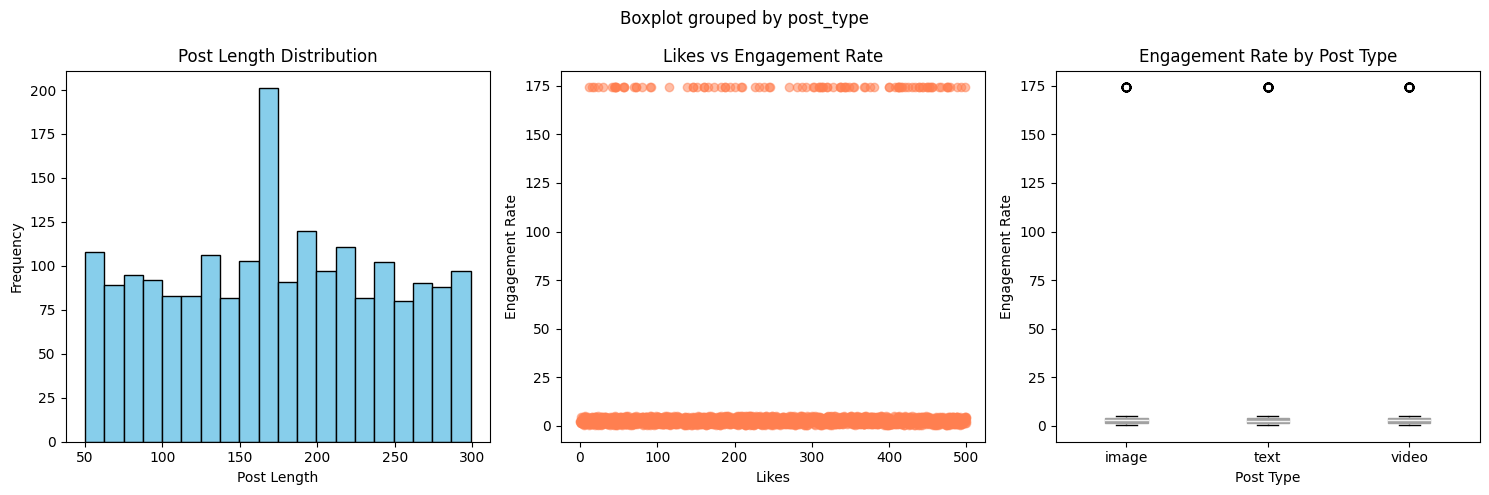

In [119]:
''' subplots'''
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
# Plot 1: post_length distribution
axes[0].hist(df['post_length'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Post Length Distribution')
axes[0].set_xlabel('Post Length')
axes[0].set_ylabel('Frequency')
# Plot 2: likes vs engagement_rate
axes[1].scatter(df['likes'], df['engagement_rate'], alpha=0.5, color='coral')
axes[1].set_title('Likes vs Engagement Rate')
axes[1].set_xlabel('Likes')
axes[1].set_ylabel('Engagement Rate')
# Plot 3: Boxplot of engagement_rate by post_type
df.boxplot(column='engagement_rate', by='post_type', ax=axes[2], grid=False, patch_artist=True)
axes[2].set_title('Engagement Rate by Post Type')
axes[2].set_xlabel('Post Type')
axes[2].set_ylabel('Engagement Rate')
plt.tight_layout()
plt.show()

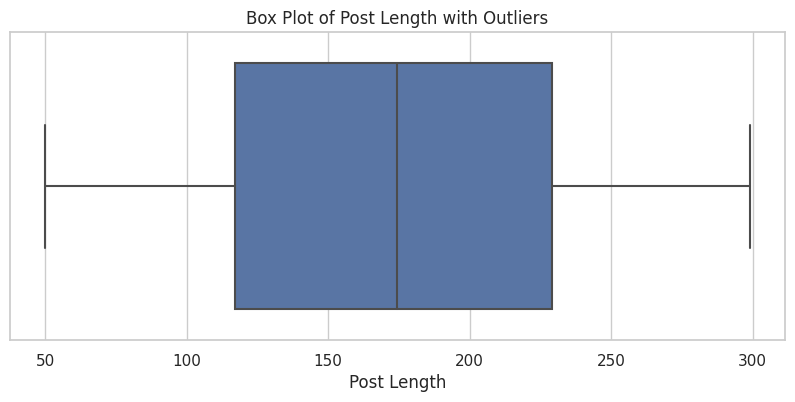

In [121]:
sns.set(style="whitegrid")
# Create a box plot with outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x='post_length', data=df, showfliers=True)
# Add labels and title
plt.title('Box Plot of Post Length with Outliers')
plt.xlabel('Post Length')
# Show the plot
plt.show()

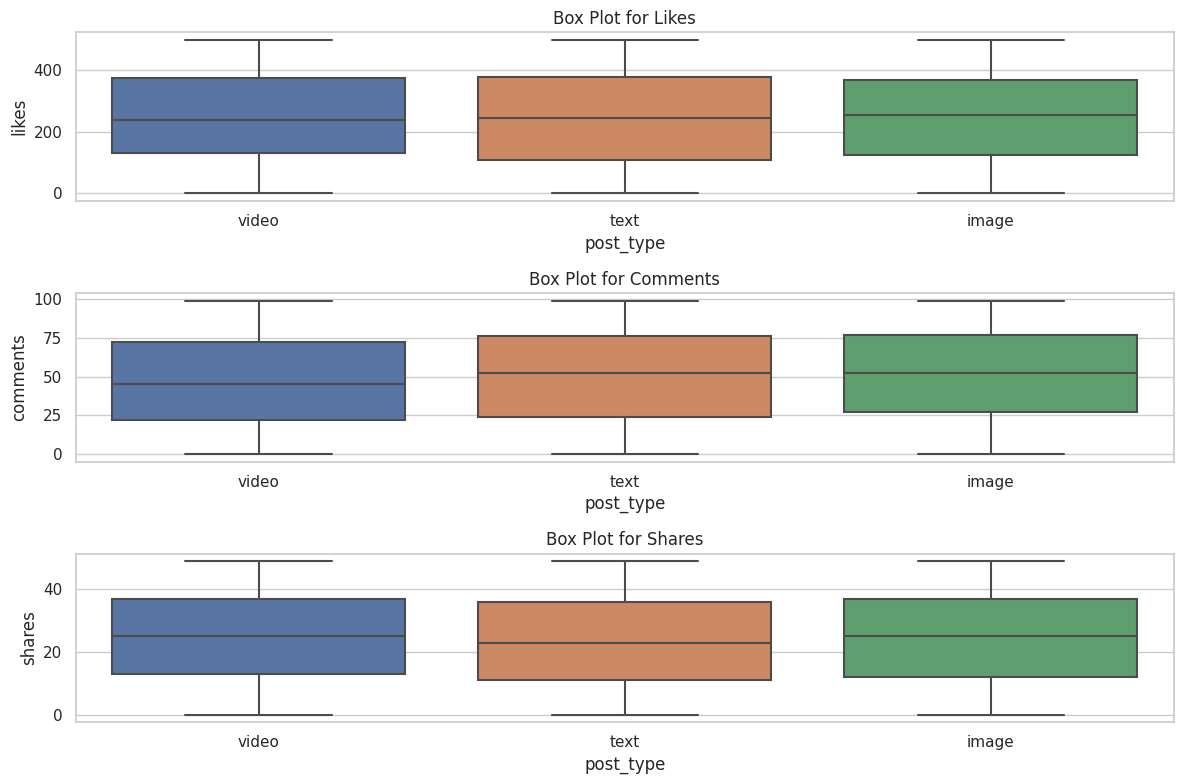

In [122]:
# Box plot for 'likes', 'comments', and 'shares'
plt.figure(figsize=(12, 8))
# Create a subplot for each metric
plt.subplot(3, 1, 1)
sns.boxplot(x='post_type', y='likes', data=df)
plt.title('Box Plot for Likes')
plt.subplot(3, 1, 2)
sns.boxplot(x='post_type', y='comments', data=df)
plt.title('Box Plot for Comments')
plt.subplot(3, 1, 3)
sns.boxplot(x='post_type', y='shares', data=df)
plt.title('Box Plot for Shares')
plt.tight_layout()
plt.show()

In [123]:
#EDA

In [124]:
#univariate and bivariate analysis

In [125]:
df=pd.read_excel('/content/mediarates.xlsx')

In [126]:
df.head()

user_id post_type  post_length  likes  comments  shares  engagement_rate  \
0        1     video        287.0    306        52      35         4.457269   
1        2      text        149.0    330        78      36         4.845244   
2        3     video        222.0    460        78      40         2.037067   
3        4     video        185.0    265         3      16         2.023281   
4        5      text        270.0    397        95      34         0.531913   

   user_followers post_category  post_hour  is_weekend  user_verified  \
0            9204       fashion          3           0              0   
1             596        sports          7           0              1   
2            1563          food         12           1              1   
3            6928        sports          9           1              0   
4            4353          food         17           1              1   

   spam_flag  
0          0  
1          0  
2          1  
3          0  
4          1

In [127]:
df.shape

(2000, 13)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2000 non-null   int64  
 1   post_type        2000 non-null   object 
 2   post_length      1900 non-null   float64
 3   likes            2000 non-null   int64  
 4   comments         2000 non-null   int64  
 5   shares           2000 non-null   int64  
 6   engagement_rate  1900 non-null   float64
 7   user_followers   2000 non-null   int64  
 8   post_category    2000 non-null   object 
 9   post_hour        2000 non-null   int64  
 10  is_weekend       2000 non-null   int64  
 11  user_verified    2000 non-null   int64  
 12  spam_flag        2000 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 203.2+ KB


In [129]:
df.dtypes

user_id              int64
post_type           object
post_length        float64
likes                int64
comments             int64
shares               int64
engagement_rate    float64
user_followers       int64
post_category       object
post_hour            int64
is_weekend           int64
user_verified        int64
spam_flag            int64
dtype: object

In [130]:
df.columns

Index(['user_id', 'post_type', 'post_length', 'likes', 'comments', 'shares',
       'engagement_rate', 'user_followers', 'post_category', 'post_hour',
       'is_weekend', 'user_verified', 'spam_flag'],
      dtype='object')

In [131]:
df.isnull().sum()

user_id              0
post_type            0
post_length        100
likes                0
comments             0
shares               0
engagement_rate    100
user_followers       0
post_category        0
post_hour            0
is_weekend           0
user_verified        0
spam_flag            0
dtype: int64

<ipython-input-132-d3e3ed4f296f>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='post_type', y='likes', data=df, ax=axes[0], ci=None, palette='viridis')
<ipython-input-132-d3e3ed4f296f>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='post_category', y='comments', data=df, ax=axes[1], ci=None, palette='muted')
<ipython-input-132-d3e3ed4f296f>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='post_hour', y='shares', data=df, ax=axes[2], ci=None, palette='Set2')


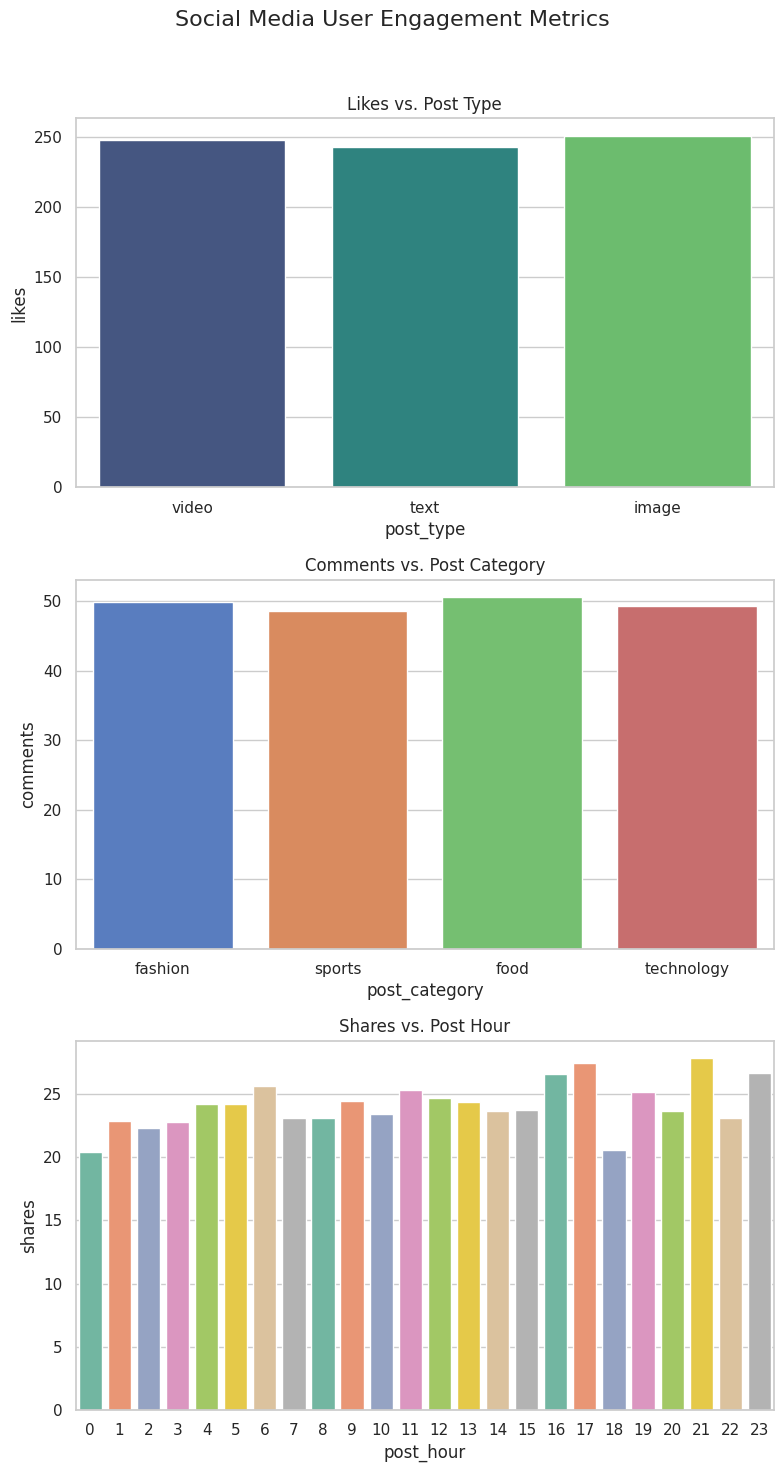

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn
sns.set(style="whitegrid")
'''Create subplots'''
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))
fig.suptitle('Social Media User Engagement Metrics', fontsize=16)
# Subplot 1: Likes vs. Post Type
sns.barplot(x='post_type', y='likes', data=df, ax=axes[0], ci=None, palette='viridis')
axes[0].set_title('Likes vs. Post Type')
# Subplot 2: Comments vs. Post Category
sns.barplot(x='post_category', y='comments', data=df, ax=axes[1], ci=None, palette='muted')
axes[1].set_title('Comments vs. Post Category')
# Subplot 3: Shares vs. Post Hour
sns.barplot(x='post_hour', y='shares', data=df, ax=axes[2], ci=None, palette='Set2')
axes[2].set_title('Shares vs. Post Hour')
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
# Show the plot
plt.show()


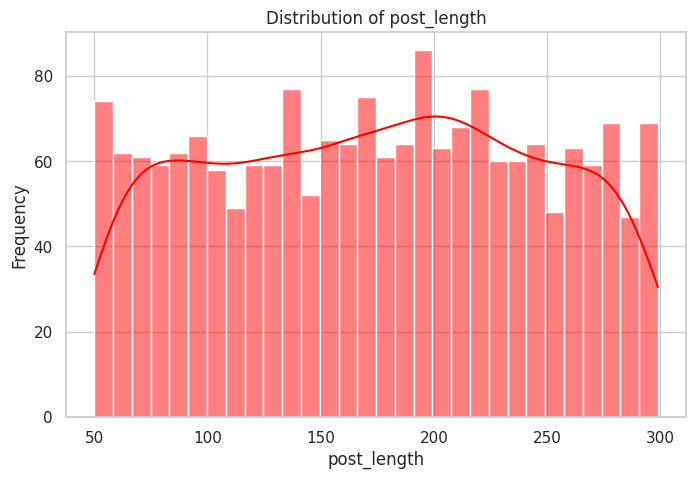

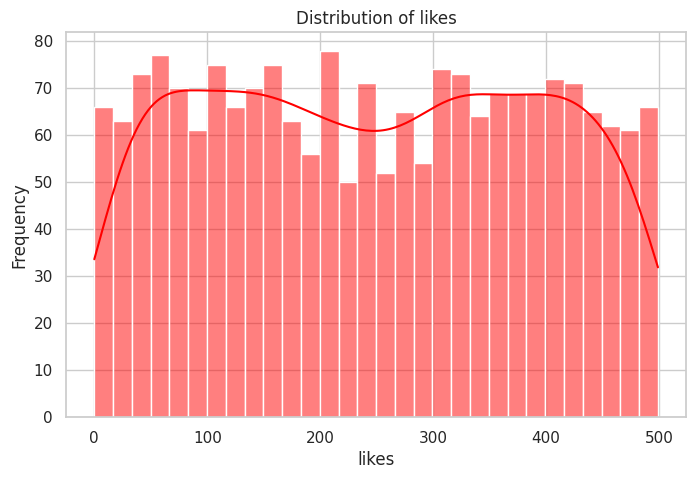

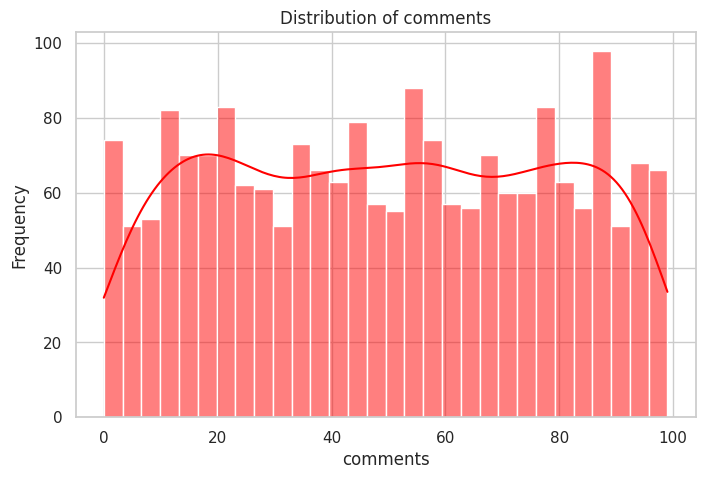

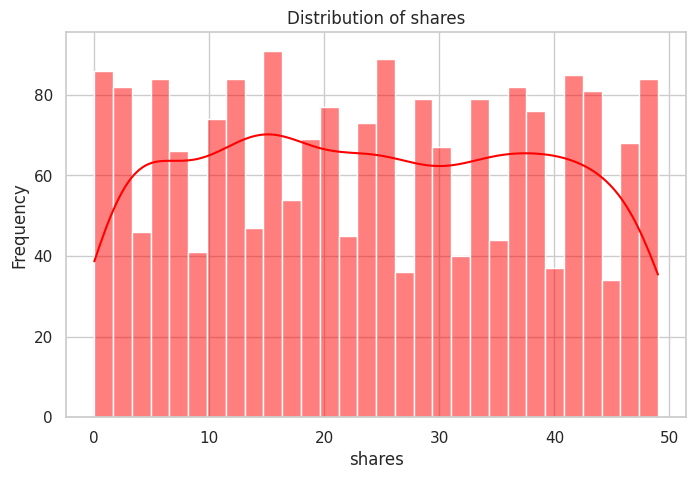

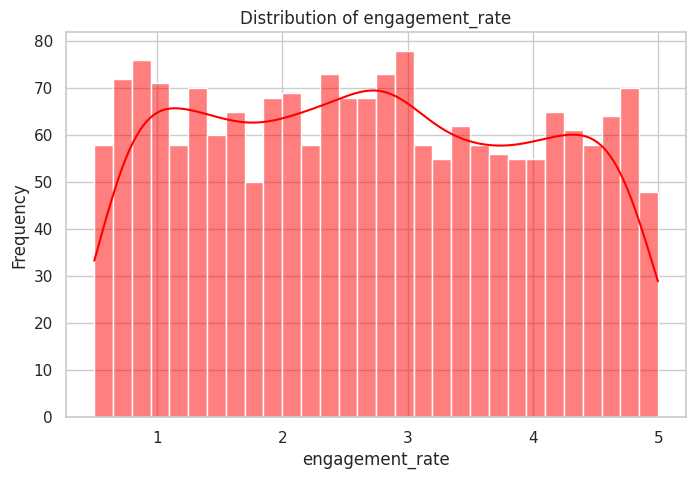

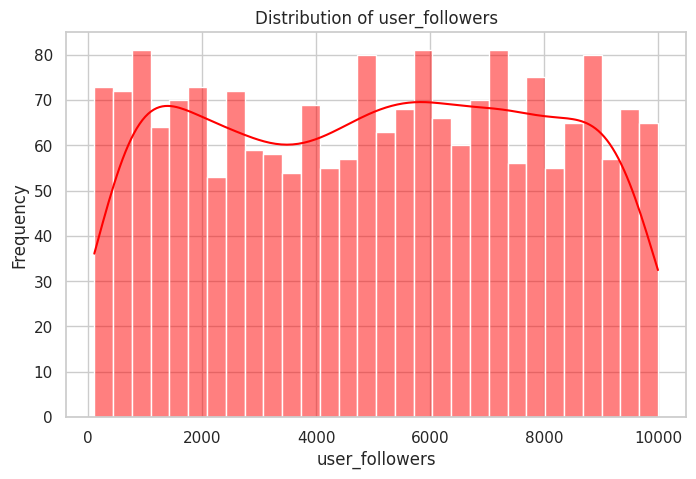

In [133]:
'''Select numerical columns for distribution analysis'''
numerical_columns = ['post_length', 'likes', 'comments', 'shares', 'engagement_rate', 'user_followers']
'''Plot histograms for numerical features'''
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column].dropna(), kde=True, bins=30, color='red')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [134]:
'''skewness'''
from scipy.stats import skew
# Assuming you have already generated and displayed the DataFrame df
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Calculate skewness for each numerical column
skewness_values = df[numerical_columns].apply(lambda x: skew(x.dropna()))
# Creating a DataFrame to display skewness values
skewness_df = pd.DataFrame({'Feature': numerical_columns, 'Skewness': skewness_values})
# Displaying the skewness values
print(skewness_df)


                         Feature  Skewness
user_id                  user_id  0.000000
post_length          post_length -0.023866
likes                      likes  0.012024
comments                comments  0.002062
shares                    shares  0.031643
engagement_rate  engagement_rate  0.052286
user_followers    user_followers -0.021212
post_hour              post_hour -0.072742
is_weekend            is_weekend  0.054020
user_verified      user_verified -0.072047
spam_flag              spam_flag  0.002000


In [135]:
df.isnull().sum()

user_id              0
post_type            0
post_length        100
likes                0
comments             0
shares               0
engagement_rate    100
user_followers       0
post_category        0
post_hour            0
is_weekend           0
user_verified        0
spam_flag            0
dtype: int64

In [136]:
'''Handle Missing Values'''
df['post_length'].fillna(df['post_length'].mean(), inplace=True)
df['engagement_rate'].fillna(df['engagement_rate'].mean(), inplace=True)
# Convert Data Types
df[['is_weekend', 'user_verified', 'spam_flag']] = df[['is_weekend', 'user_verified', 'spam_flag']].astype(bool)
# Perform Categorical Encoding
df = pd.get_dummies(df, columns=['post_type', 'post_category'], drop_first=True)
# Display the first few rows of the cleaned dataset
print(df.head())


   user_id  post_length  likes  comments  shares  engagement_rate  \
0        1        287.0    306        52      35         4.457269   
1        2        149.0    330        78      36         4.845244   
2        3        222.0    460        78      40         2.037067   
3        4        185.0    265         3      16         2.023281   
4        5        270.0    397        95      34         0.531913   

   user_followers  post_hour  is_weekend  user_verified  spam_flag  \
0            9204          3       False          False      False   
1             596          7       False           True      False   
2            1563         12        True           True       True   
3            6928          9        True          False      False   
4            4353         17        True           True       True   

   post_type_text  post_type_video  post_category_food  post_category_sports  \
0               0                1                   0                     0   
1   

In [137]:
df.isnull().sum()

user_id                     0
post_length                 0
likes                       0
comments                    0
shares                      0
engagement_rate             0
user_followers              0
post_hour                   0
is_weekend                  0
user_verified               0
spam_flag                   0
post_type_text              0
post_type_video             0
post_category_food          0
post_category_sports        0
post_category_technology    0
dtype: int64

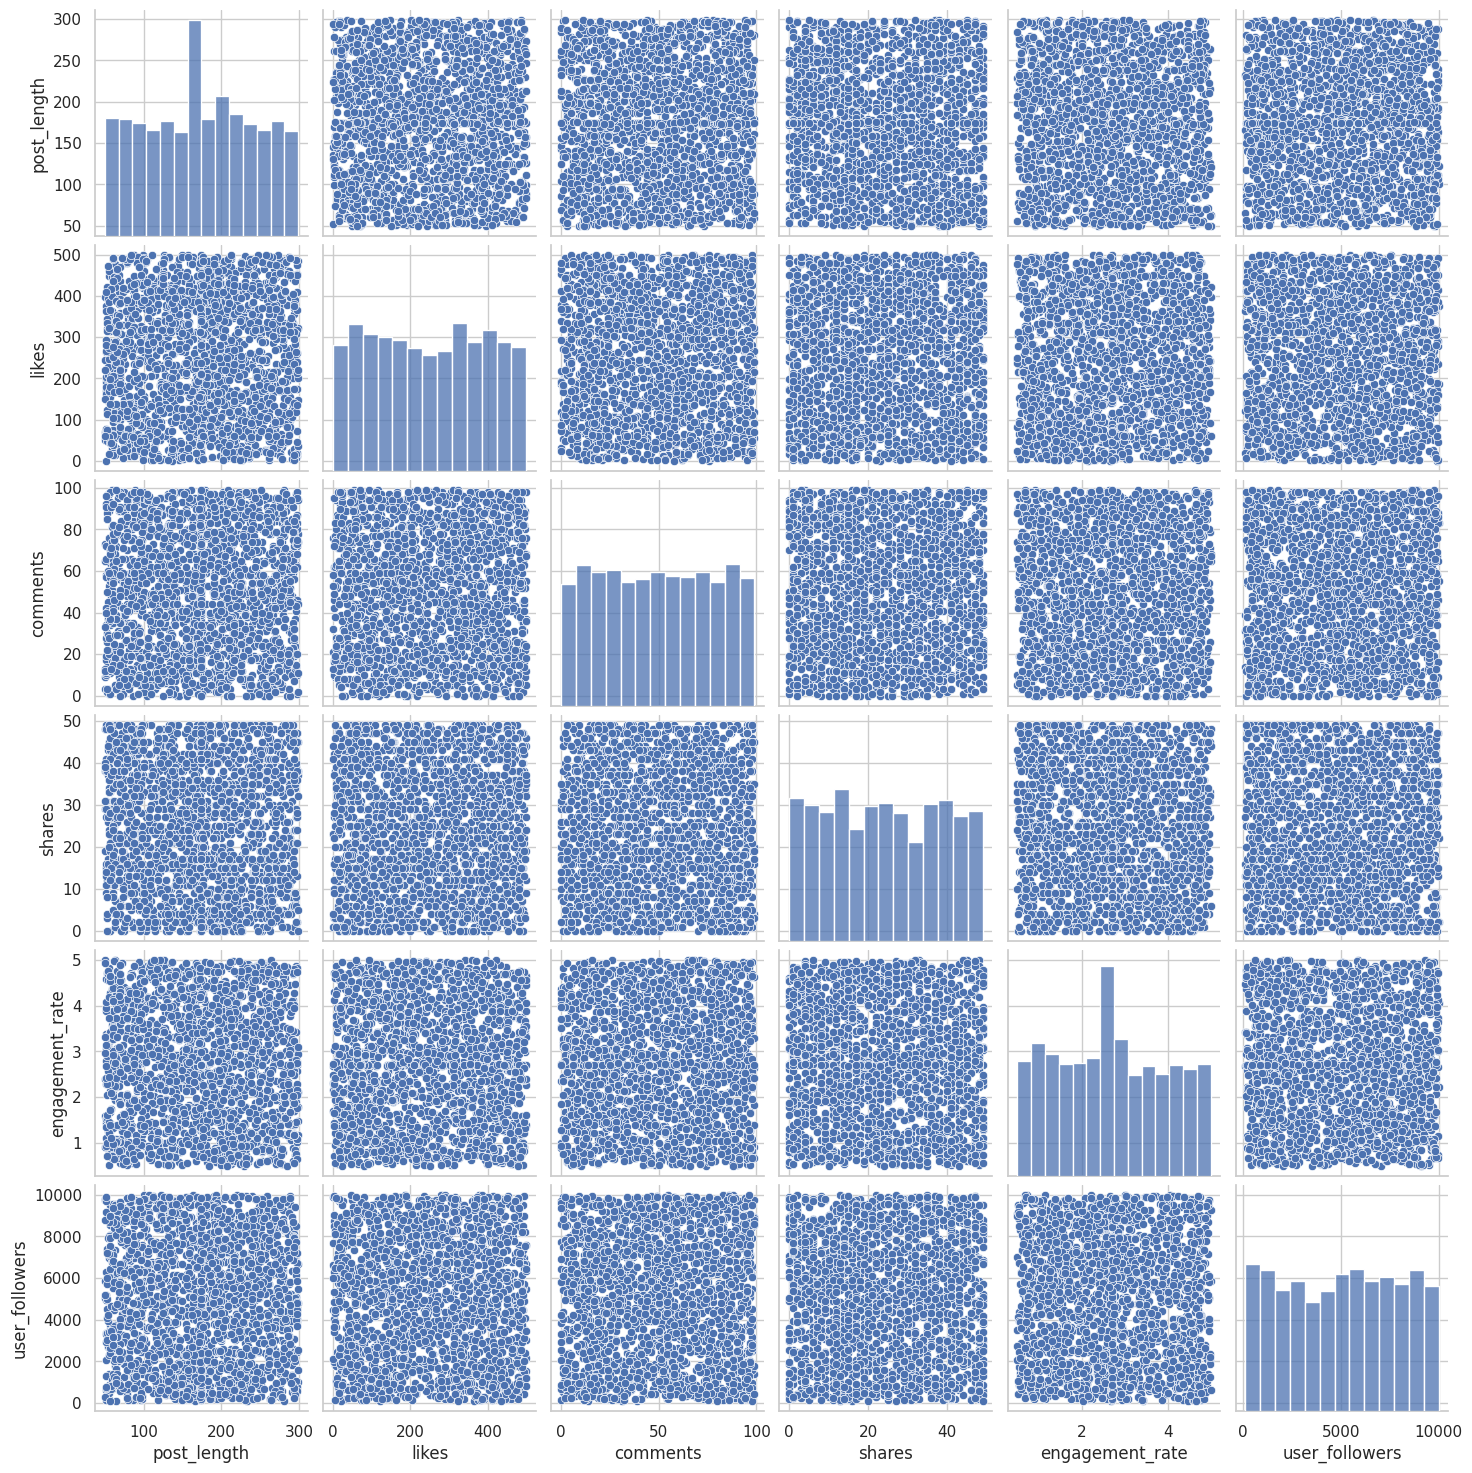

In [138]:
numerical_cols = ['post_length', 'likes', 'comments', 'shares', 'engagement_rate', 'user_followers']
# Drop NaN values for pairplot
df_pairplot = df[numerical_cols].dropna()
'''Create pairplot'''
sns.pairplot(df_pairplot)
plt.show()

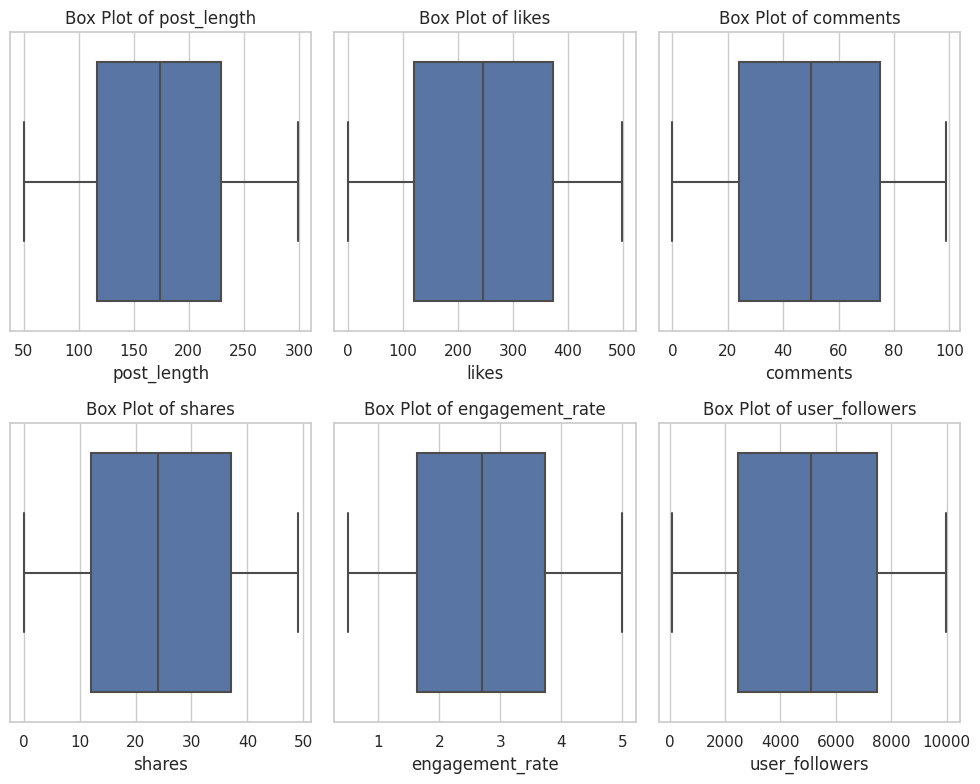

In [139]:
sns.set(style="whitegrid")
# Define the columns for which you want to create box plots
numeric_columns = ['post_length', 'likes', 'comments', 'shares', 'engagement_rate', 'user_followers']
''' Create box plots'''
plt.figure(figsize=(10, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [140]:
'''LOF'''
from sklearn.neighbors import LocalOutlierFactor
# Your existing code to generate the dataset
# ...
# Specify the columns for LOF analysis
lof_columns = ['post_length', 'likes', 'comments', 'shares', 'engagement_rate', 'user_followers']
# Create a copy of the DataFrame to keep the original intact
df_before_outliers = df.copy()
# Extract the relevant columns for LOF analysis
data_for_lof = df[lof_columns].fillna(0)  # Fill NaN values with 0 for LOF
# Fit LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_scores = lof.fit_predict(data_for_lof)
# Identify and remove outliers
outliers_mask = outlier_scores != -1
df = df.loc[outliers_mask].reset_index(drop=True)
# Display the shape before and after removing outliers
print("Shape before removing outliers:", df_before_outliers.shape)
print("Shape after removing outliers:", df.shape)


Shape before removing outliers: (2000, 16)
Shape after removing outliers: (1900, 16)


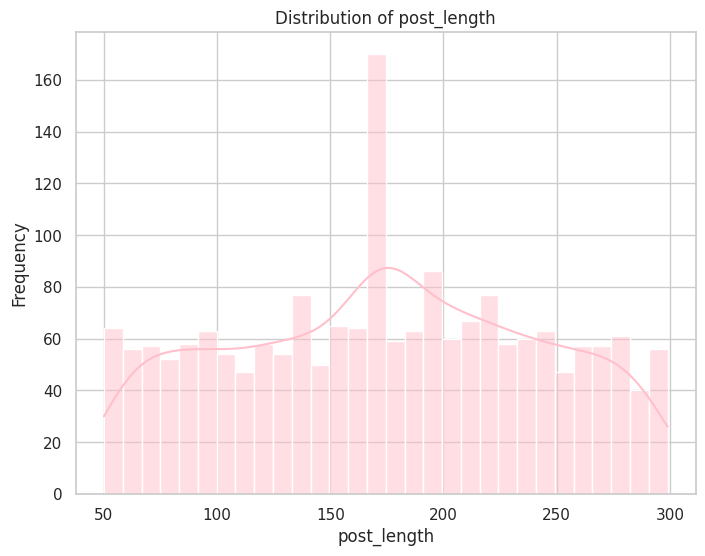

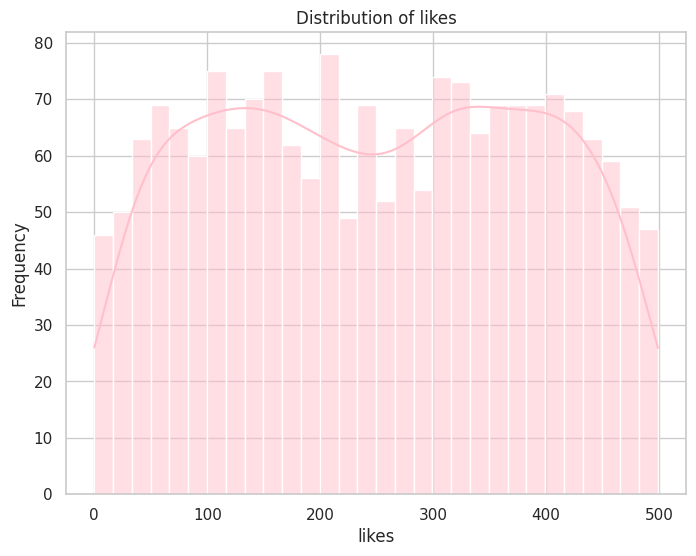

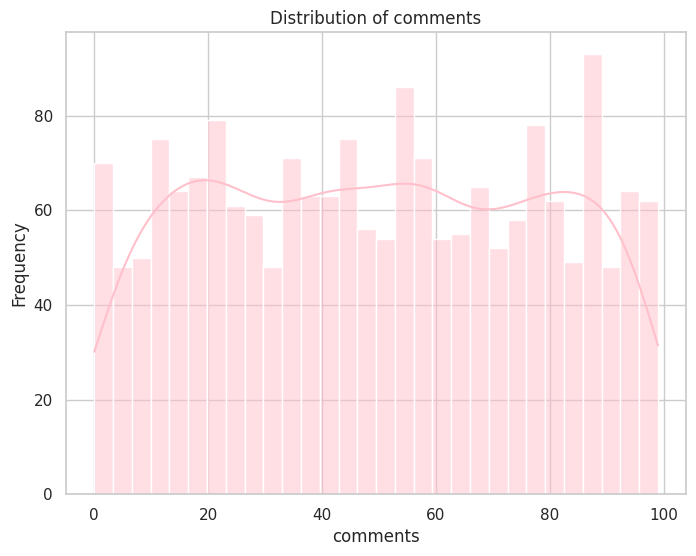

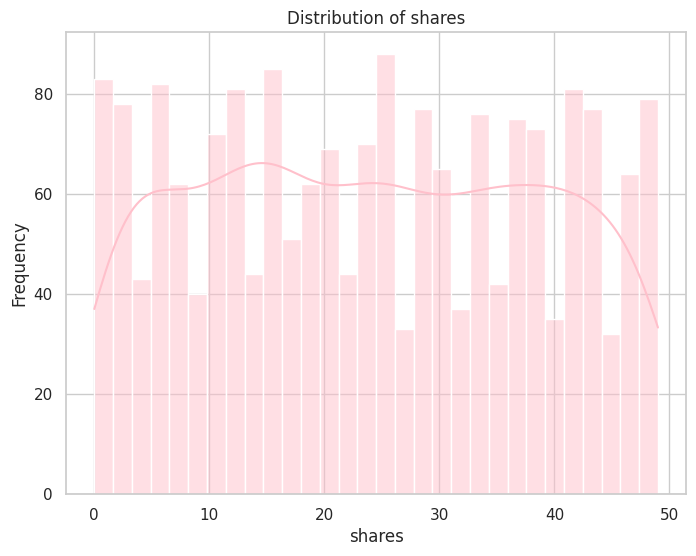

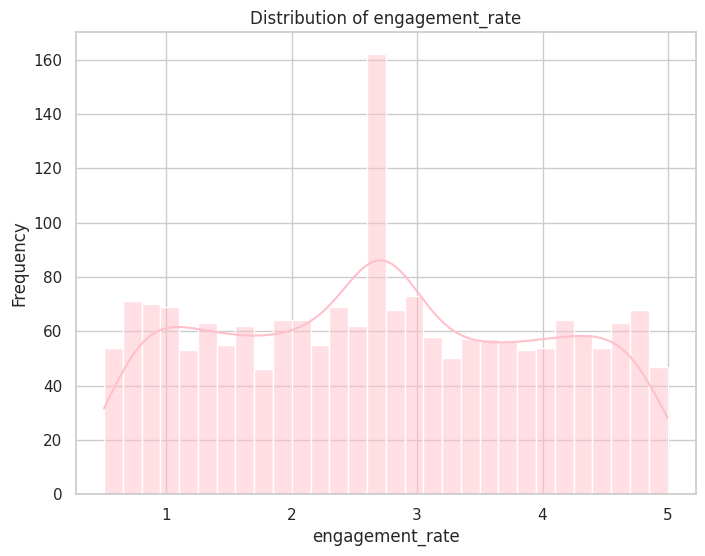

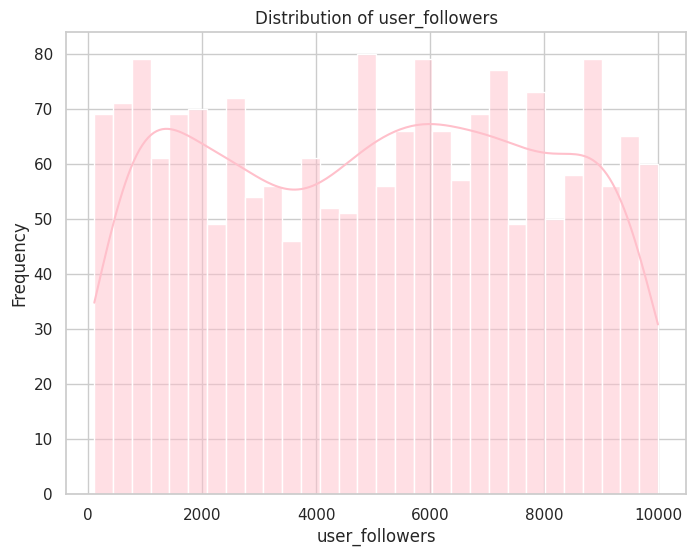

In [142]:
'''continuous columns'''
# Set the style for the plots
sns.set(style="whitegrid")
# Define the columns for analysis
continuous_columns = ['post_length', 'likes', 'comments', 'shares', 'engagement_rate', 'user_followers']
# Plot histograms for each continuous column
for column in continuous_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column].dropna(), kde=True, color='pink', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

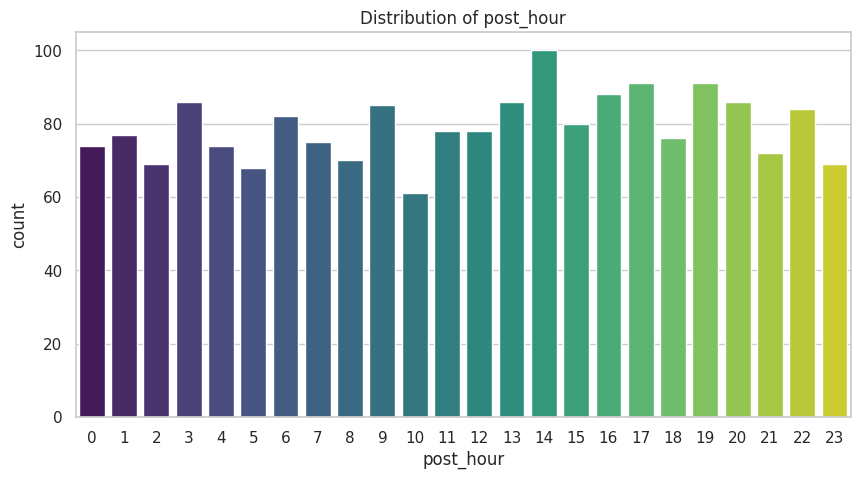

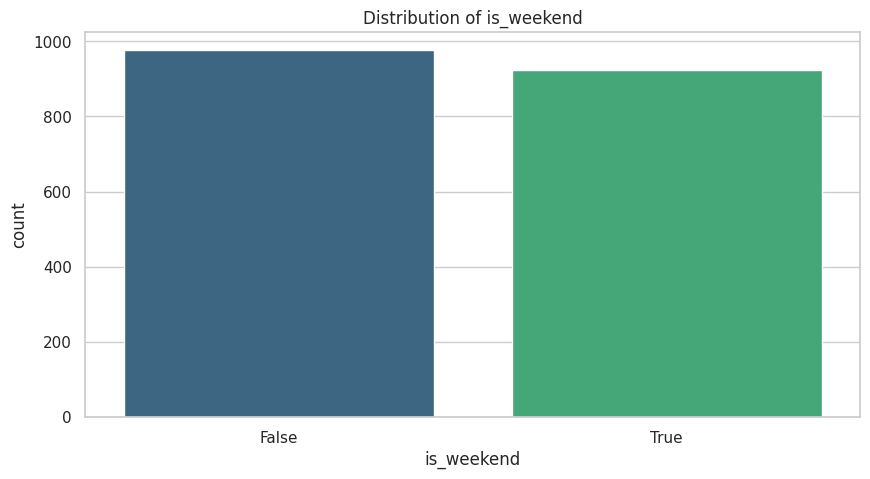

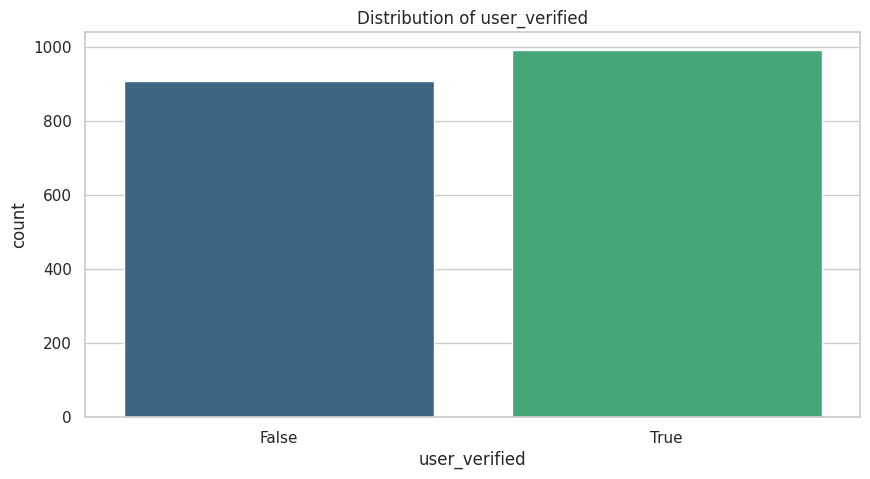

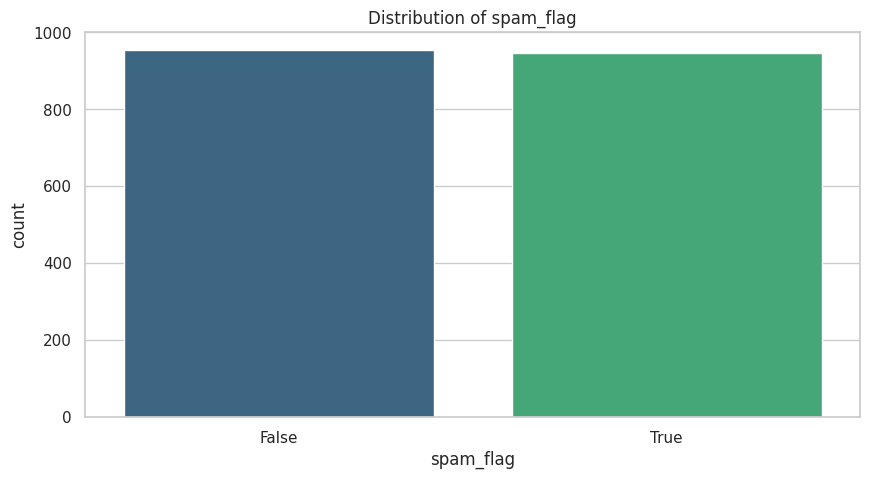

In [143]:
'''discrete variables'''
# Set style for better visualization
sns.set(style="whitegrid")
# Define the discrete variables for analysis
discrete_vars = [ 'post_hour', 'is_weekend', 'user_verified', 'spam_flag']
# Plot histograms for each discrete variable
for var in discrete_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, data=df, palette="viridis")
    plt.title(f'Distribution of {var}')
    plt.show()

In [144]:
df.isnull().sum()

user_id                     0
post_length                 0
likes                       0
comments                    0
shares                      0
engagement_rate             0
user_followers              0
post_hour                   0
is_weekend                  0
user_verified               0
spam_flag                   0
post_type_text              0
post_type_video             0
post_category_food          0
post_category_sports        0
post_category_technology    0
dtype: int64

                           user_id  post_length     likes  comments    shares  \
user_id                   1.000000     0.022270 -0.005597 -0.009432  0.008414   
post_length               0.022270     1.000000  0.009817  0.034183 -0.034783   
likes                    -0.005597     0.009817  1.000000  0.041552  0.018680   
comments                 -0.009432     0.034183  0.041552  1.000000  0.015912   
shares                    0.008414    -0.034783  0.018680  0.015912  1.000000   
engagement_rate          -0.025092     0.012130  0.004167  0.014103 -0.043046   
user_followers            0.024982    -0.026506 -0.015959 -0.011624 -0.004098   
post_hour                 0.008174    -0.005918  0.005297  0.038247  0.069194   
is_weekend               -0.003117     0.008116  0.030130 -0.013595 -0.021613   
user_verified            -0.028459     0.026880  0.019241 -0.000995 -0.026345   
spam_flag                 0.039932    -0.013291  0.030308  0.009775 -0.011360   
post_type_text           -0.

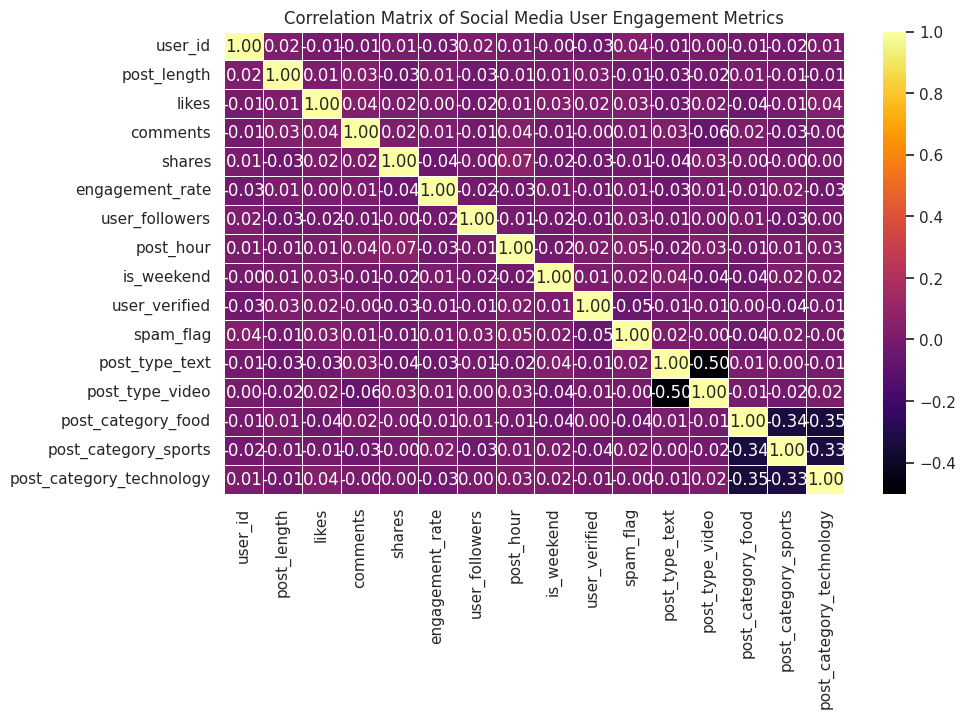

In [145]:
''' Calculate the correlation matrix'''
correlation_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Social Media User Engagement Metrics')
plt.show()

In [146]:
'''Display the correlation matrix'''
print("Correlation Matrix:")
print(correlation_matrix)
# Extract strongly correlated pairs
strongly_correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
strongly_correlated_pairs = strongly_correlated_pairs[strongly_correlated_pairs != 1]

# Display strongly correlated pairs
print("\nStrongly Correlated Feature Pairs:")
print(strongly_correlated_pairs)

Correlation Matrix:
                           user_id  post_length     likes  comments    shares  \
user_id                   1.000000     0.022270 -0.005597 -0.009432  0.008414   
post_length               0.022270     1.000000  0.009817  0.034183 -0.034783   
likes                    -0.005597     0.009817  1.000000  0.041552  0.018680   
comments                 -0.009432     0.034183  0.041552  1.000000  0.015912   
shares                    0.008414    -0.034783  0.018680  0.015912  1.000000   
engagement_rate          -0.025092     0.012130  0.004167  0.014103 -0.043046   
user_followers            0.024982    -0.026506 -0.015959 -0.011624 -0.004098   
post_hour                 0.008174    -0.005918  0.005297  0.038247  0.069194   
is_weekend               -0.003117     0.008116  0.030130 -0.013595 -0.021613   
user_verified            -0.028459     0.026880  0.019241 -0.000995 -0.026345   
spam_flag                 0.039932    -0.013291  0.030308  0.009775 -0.011360   
post_typ

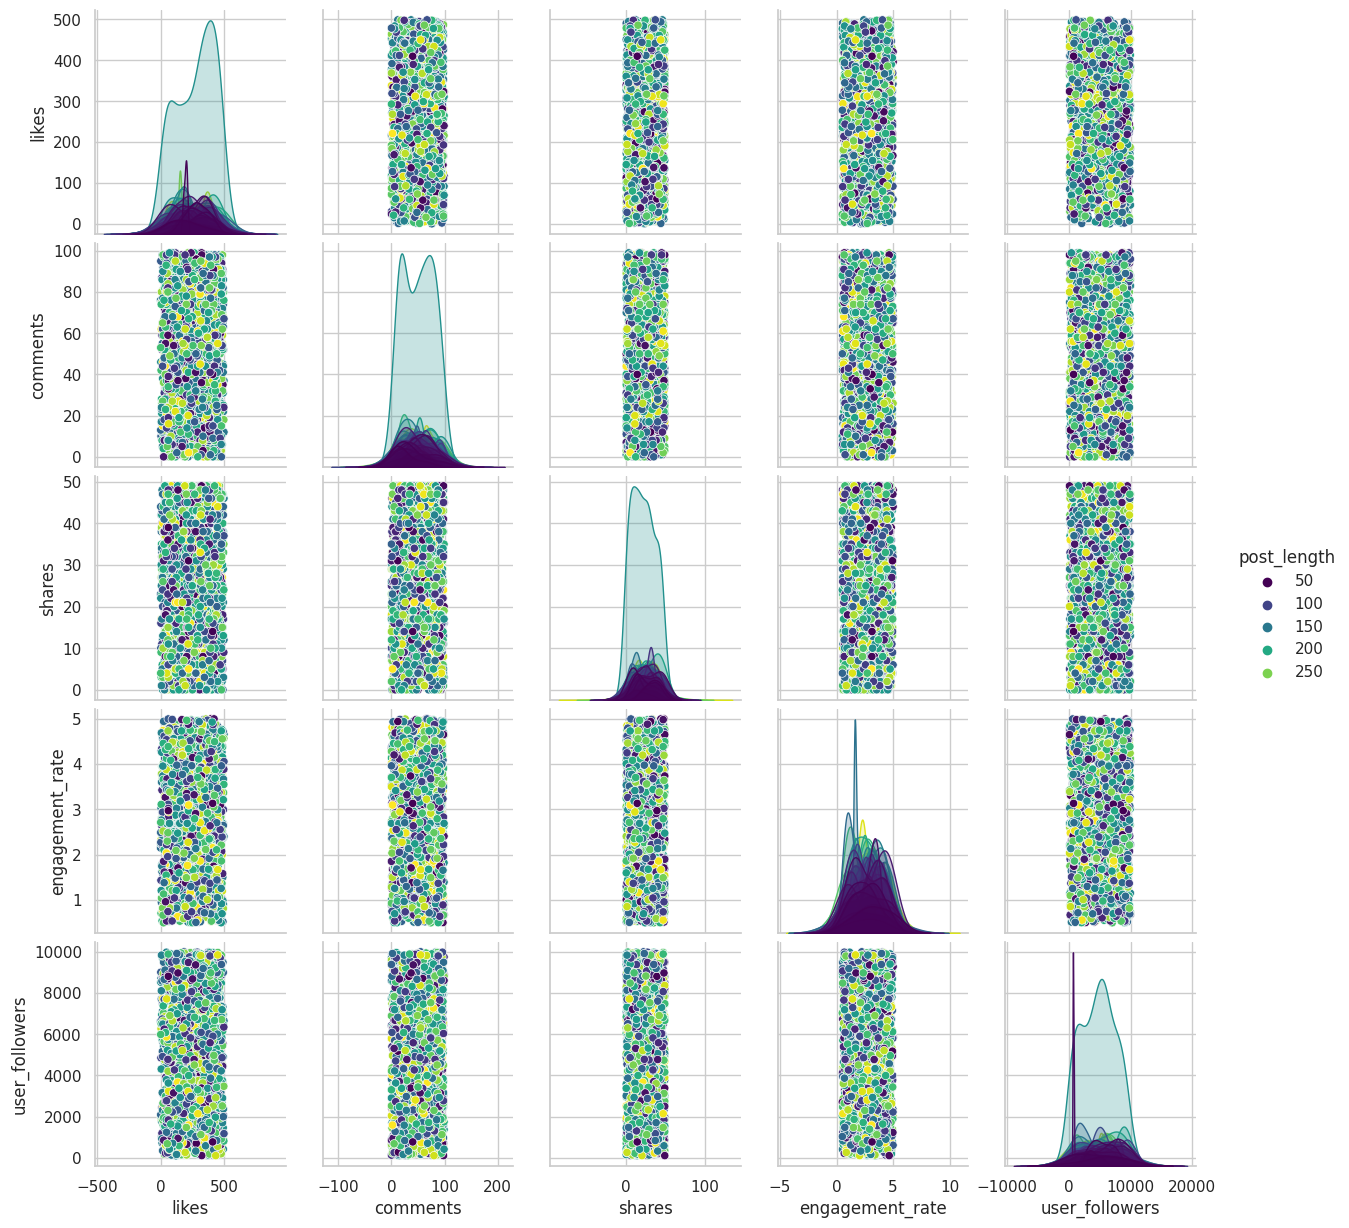

In [147]:
'''Select features for pairplot'''
selected_features = ['post_length', 'likes', 'comments', 'shares', 'engagement_rate', 'user_followers']

# Create a pairplot
sns.pairplot(df[selected_features], diag_kind='kde', markers='o', hue='post_length', palette='viridis')

# Show the plot
plt.show()

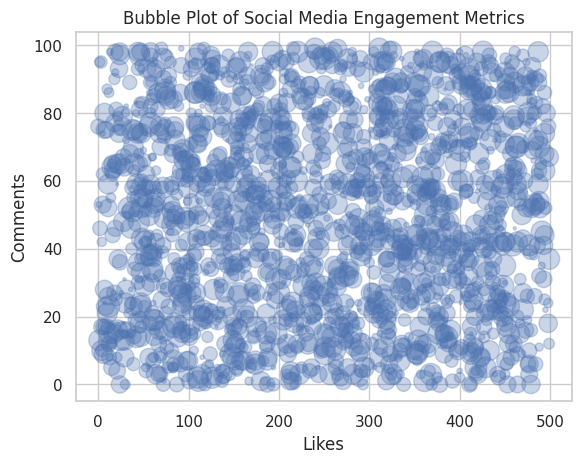

In [149]:
'''Bubble plot example'''
plt.scatter(df['likes'], df['comments'], s=df['shares']*5, alpha=0.3)
plt.title('Bubble Plot of Social Media Engagement Metrics')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()

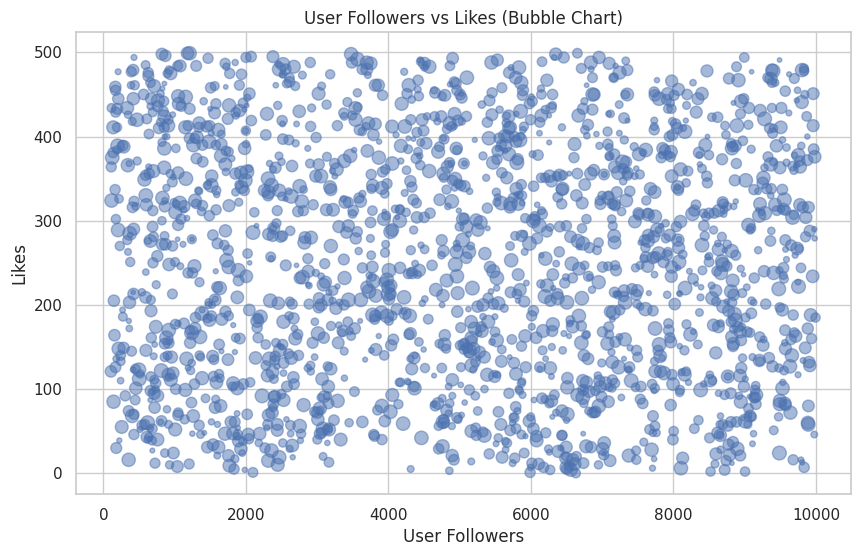

In [150]:
import matplotlib.pyplot as plt

# Plotting bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df['user_followers'], df['likes'], s=df['engagement_rate']*20, alpha=0.5)

# Adding labels and title
plt.xlabel('User Followers')
plt.ylabel('Likes')
plt.title('User Followers vs Likes (Bubble Chart)')

# Show plot
plt.show()



In [151]:
'''Multivariate analysis'''

'Multivariate analysis'

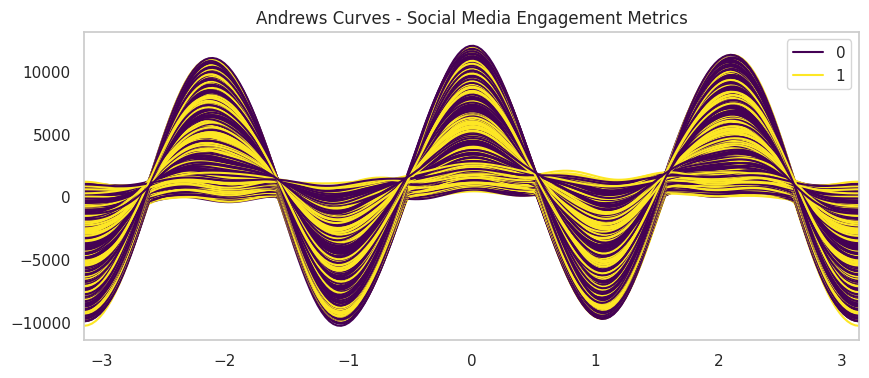

In [152]:
from pandas.plotting import andrews_curves
df['label'] = np.random.choice([0, 1], len(df))

# Perform Andrews Curves
plt.figure(figsize=(10, 4))
andrews_curves(df, 'label', colormap='viridis')
plt.title('Andrews Curves - Social Media Engagement Metrics')
plt.show()

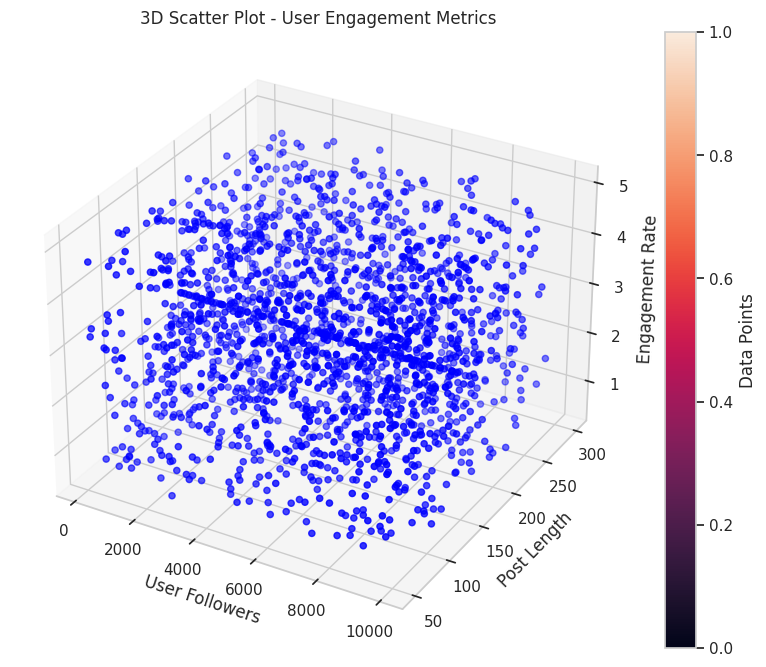

In [153]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

''' Create a 3D scatter plot'''
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df['user_followers'], df['post_length'], df['engagement_rate'], c='blue', marker='o')

# Set labels
ax.set_xlabel('User Followers')
ax.set_ylabel('Post Length')
ax.set_zlabel('Engagement Rate')

# Set title
ax.set_title('3D Scatter Plot - User Engagement Metrics')

# Add color bar
fig.colorbar(scatter, ax=ax, label='Data Points')

# Show the plot
plt.show()


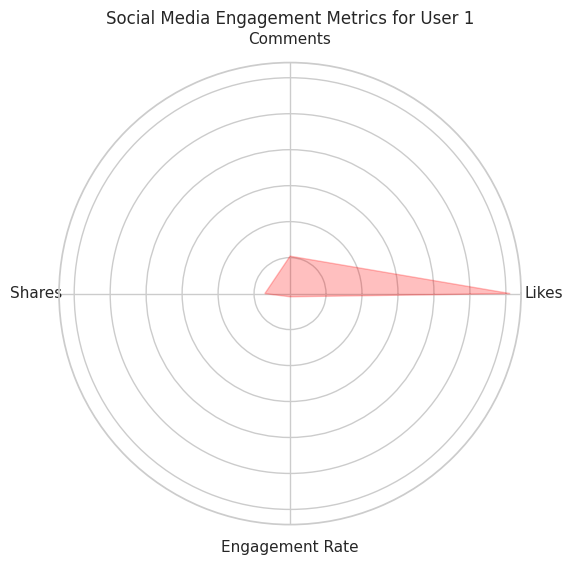

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your code to generate the dataset (assuming it's already done)

# Assuming you want to compare 'likes', 'comments', 'shares', and 'engagement_rate' for the first user (user_id = 1)
user_data = df[df['user_id'] == 1][['likes', 'comments', 'shares', 'engagement_rate']].fillna(0).values.flatten()

labels = ['Likes', 'Comments', 'Shares', 'Engagement Rate']
num_vars = len(labels)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end
user_data = np.concatenate((user_data,[user_data[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, user_data, color='red', alpha=0.25)
ax.set_yticklabels([])
plt.xticks(angles[:-1], labels)
plt.title(f'Social Media Engagement Metrics for User {1}')
plt.show()


In [155]:
#Time Series Analysis

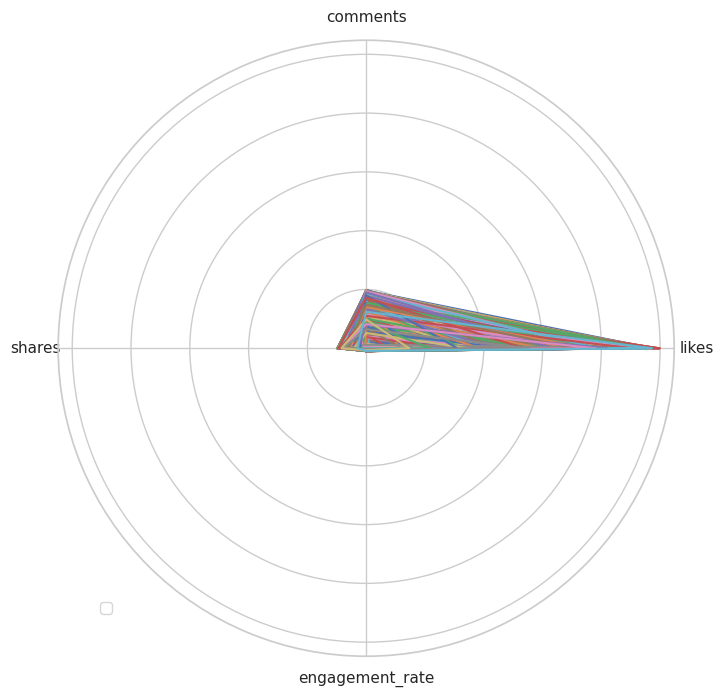

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Assuming you have already generated the synthetic dataset and created the DataFrame 'df'

# Select some metrics for radar chart
metrics = ['likes', 'comments', 'shares', 'engagement_rate']

# Set the number of metrics
num_metrics = len(metrics)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Compute angles for each metric
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# The first metric (likes) should be at the top of the chart
angles += angles[:1]

# Plot the data without user labels
for i, user_id in enumerate(df['user_id']):
    values = df.loc[df['user_id'] == user_id, metrics].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values)

# Add labels to each axis
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)

# Remove user labels
ax.set_yticklabels([])

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


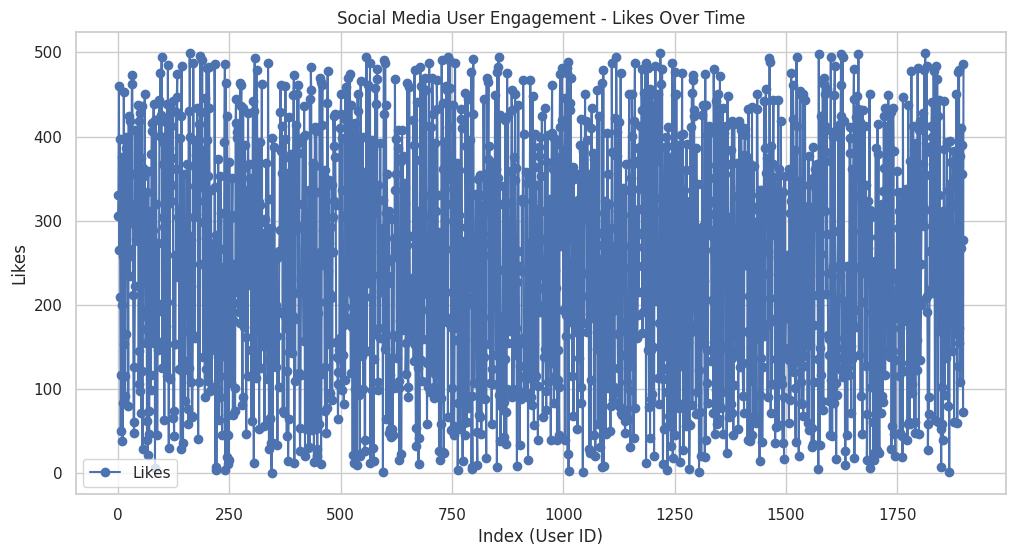

In [157]:
import matplotlib.pyplot as plt

# Assuming you have already executed the code to generate the dataset

# Set a numerical index
df.reset_index(drop=True, inplace=True)

# Sort the DataFrame based on the index
df.sort_index(inplace=True)

# Plotting time series for 'likes'
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['likes'], label='Likes', marker='o')
plt.title('Social Media User Engagement - Likes Over Time')
plt.xlabel('Index (User ID)')
plt.ylabel('Likes')
plt.legend()
plt.show()

In [158]:
#Outlier Analysis

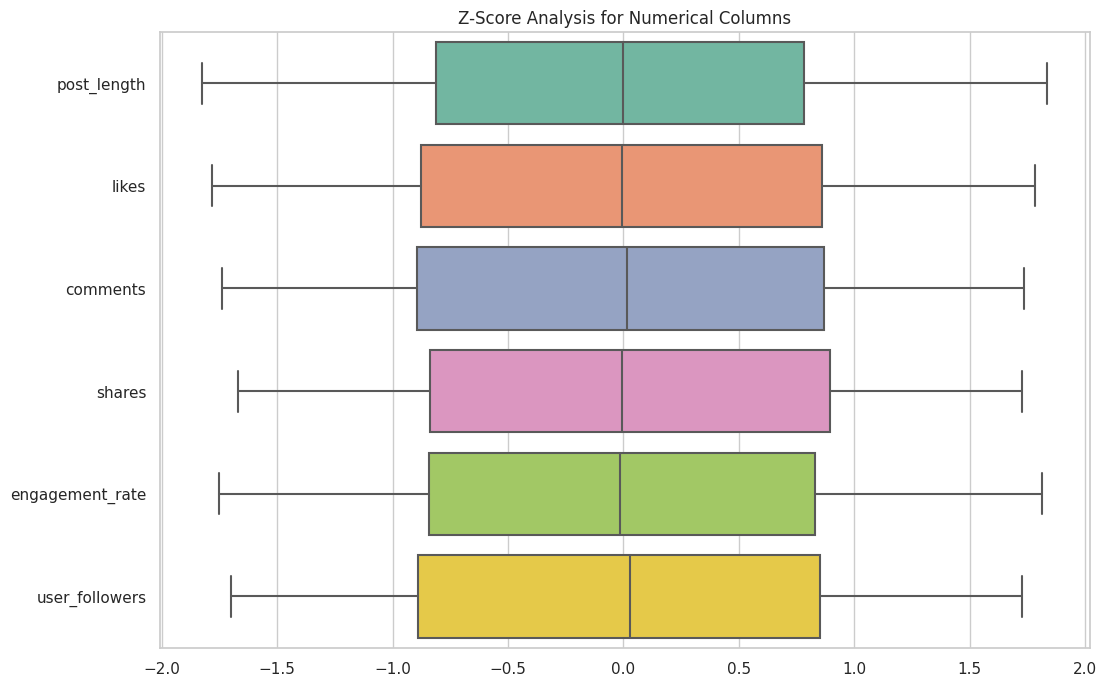

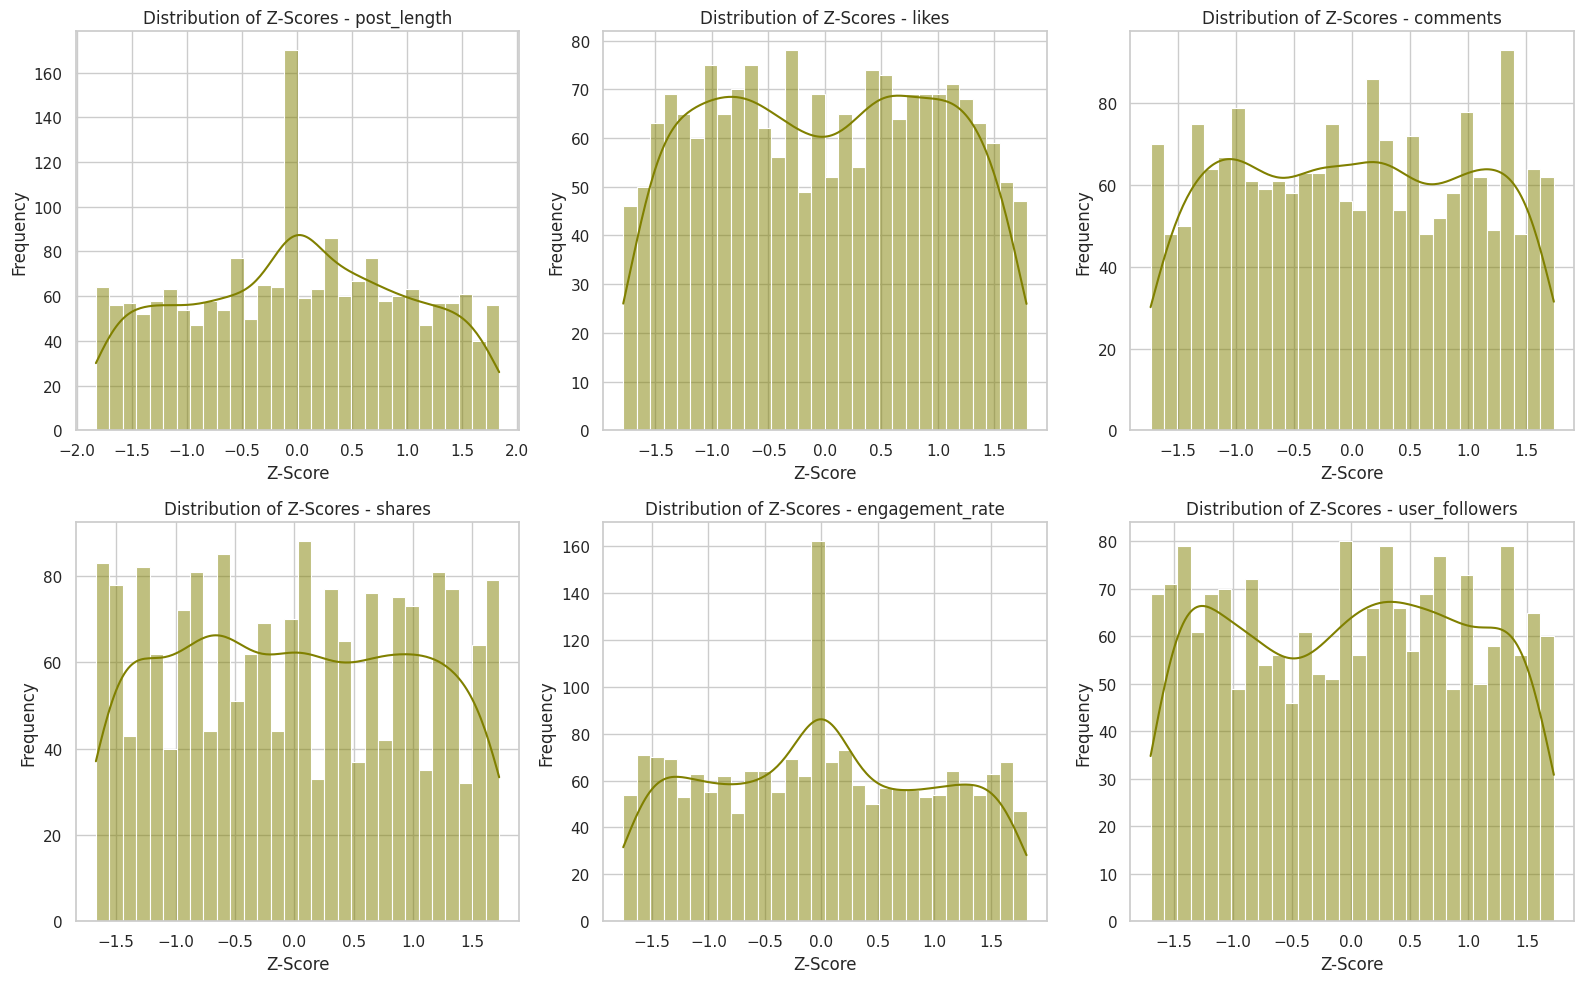

In [159]:
# Columns to consider for Z-Score analysis
numerical_columns = ['post_length', 'likes', 'comments', 'shares', 'engagement_rate', 'user_followers']

# Calculate Z-Scores for selected columns
z_scores = (df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std()

# Plot Z-Scores using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=z_scores, orient='h', palette='Set2')
plt.title('Z-Score Analysis for Numerical Columns')
plt.show()

# Plot distribution of Z-Scores for each numerical column
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(z_scores[column], kde=True, bins=30, color='olive')
    plt.title(f'Distribution of Z-Scores - {column}')
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [160]:
#Interactive Visualization:

In [161]:
import plotly.express as px

# Remove rows with NaN values for the plot
cleaned_df = df.dropna(subset=['likes', 'comments', 'shares', 'engagement_rate'])

# Create an interactive 3D scatter plot
fig = px.scatter_3d(cleaned_df, x='likes', y='comments', z='shares', color='engagement_rate',
                    opacity=0.7, size_max=10, template='plotly_dark',
                    labels={'likes': 'Likes', 'comments': 'Comments', 'shares': 'Shares'})

# Show the plot
fig.show()

In [162]:
'''The End'''

'The End'